In [ ]:
!pip install dask[dataframe]
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);  # to display all columns and rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # The number of numbers that will be shown after the comma.

In [ ]:
url = 'https://gist.githubusercontent.com/ismaelc/8c3f4a505c0ce3ce410429b0379a02b6/raw/0ed96c6f4f7ec0b06809286438f4ecccde9eba04/diabetes.csv'
diabetes_df = pd.read_csv(url)
diabetes_df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})
diabetes_df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              4      183              0              0        0 28.40   
1              5      162            104              0        0 37.70   
2              2      197             70             99        0 34.70   
3             13      158            114              0        0 42.30   
4              0      162             76             56      100 53.20   
5              0       57             60              0        0 21.70   
6              0      101             76              0        0 35.70   
7              1       90             62             18       59 25.10   
8              5      117             86             30      105 39.10   
9              1      124             74             36        0 27.80   
10             2      107             74             30      100 33.60   
11             1      181             78             42      293 40.00   
12             1      117             88             24      145 34.50   
13            10      115              0              0        0  0.00   
14             0      139             62             17      210 22.10   
15             1      106             70             28      135 34.20   
16             4      112             78             40        0 39.40   
17             4      154             62             31      284 32.80   
18            11      143             94             33      146 36.60   
19             2      114             68             22        0 28.70   
20             2      108             80              0        0 27.00   
21             3      125             58              0        0 31.60   
22             5      111             72             28        0 23.90   
23             0      189            104             25        0 34.30   
24             6      124             72              0        0 27.60   
25             1      111             94              0        0 32.80   
26             0      173             78             32      265 46.50   
27             4      115             72              0        0 28.90   
28             4      144             58             28      140 29.50   
29             4       99             72             17        0 25.60   
30             4      120             68              0        0 29.60   
31             9      165             88              0        0 30.40   
32             4       99             68             38        0 32.80   
33             1      116             78             29      180 36.10   
34             0      105             68             22        0 20.00   
35             7      106             92             18        0 22.70   
36             6      111             64             39        0 34.20   
37             7      109             80             31        0 35.90   
38             3      116              0              0        0 23.50   
39             5       88             66             21       23 24.40   
40             3      120             70             30      135 42.90   
41             1       99             72             30       18 38.60   
42            10      168             74              0        0 38.00   
43             5      147             75              0        0 29.90   
44             3      141              0              0        0 30.00   
45             8      126             74             38       75 25.90   
46            12      100             84             33      105 30.00   
47             2      122             52             43      158 36.20   
48             9       72             78             25        0 31.60   
49             0      145              0              0        0 44.20   
50             6      144             72             27      228 33.90   
51             2      125             60             20      140 33.80   
52             1      151             60              0        0 26.10   
53       

In [ ]:
diabetes_df.shape


(508, 9)

In [ ]:
diabetes_df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T



count   mean    std   min   10%    25%    50%  \
Pregnancies              508.00   3.91   3.31  0.00  0.00   1.00   3.00   
Glucose                  508.00 120.91  31.79  0.00 85.00 100.00 117.00   
BloodPressure            508.00  68.47  20.44  0.00 52.00  62.00  71.00   
SkinThickness            508.00  19.57  16.28  0.00  0.00   0.00  22.00   
Insulin                  508.00  80.23 119.69  0.00  0.00   0.00   0.00   
BMI                      508.00  31.76   8.07  0.00 23.27  26.60  32.00   
DiabetesPedigreeFunction 508.00   0.46   0.32  0.08  0.16   0.25   0.38   
Age                      508.00  33.35  11.77 21.00 22.00  24.00  29.00   
Outcome                  508.00   0.34   0.48  0.00  0.00   0.00   0.00   

                            75%    90%    95%    99%    max  
Pregnancies                6.00   9.00  10.00  13.00  14.00  
Glucose                  140.00 166.30 181.00 196.00 198.00  
BloodPressure             80.00  88.00  92.00 107.86 122.00  
SkinThickness             32.00  40.00  44.00  50.00  99.00  
Insulin                  127.25 215.00 300.15 537.90 846.00  
BMI                       36.62  41.06  44.16  49.97  59.40  
DiabetesPedigreeFunction   0.59   0.83   1.13   1.69   2.42  
Age                       41.00  51.00  58.00  66.93  81.00  
Outcome                    1.00   1.00   1.00   1.00   1.00

In [ ]:
diabetes_df["Outcome"].value_counts()*100/len(diabetes_df)


Outcome
0   65.55
1   34.45
Name: count, dtype: float64

In [ ]:
diabetes_df.Outcome.value_counts()


Outcome
0    333
1    175
Name: count, dtype: int64

In [ ]:
diabetes_df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [ ]:
diabetes_df.isnull().sum()


Pregnancies                   0
Glucose                       3
BloodPressure                27
SkinThickness               167
Insulin                     255
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

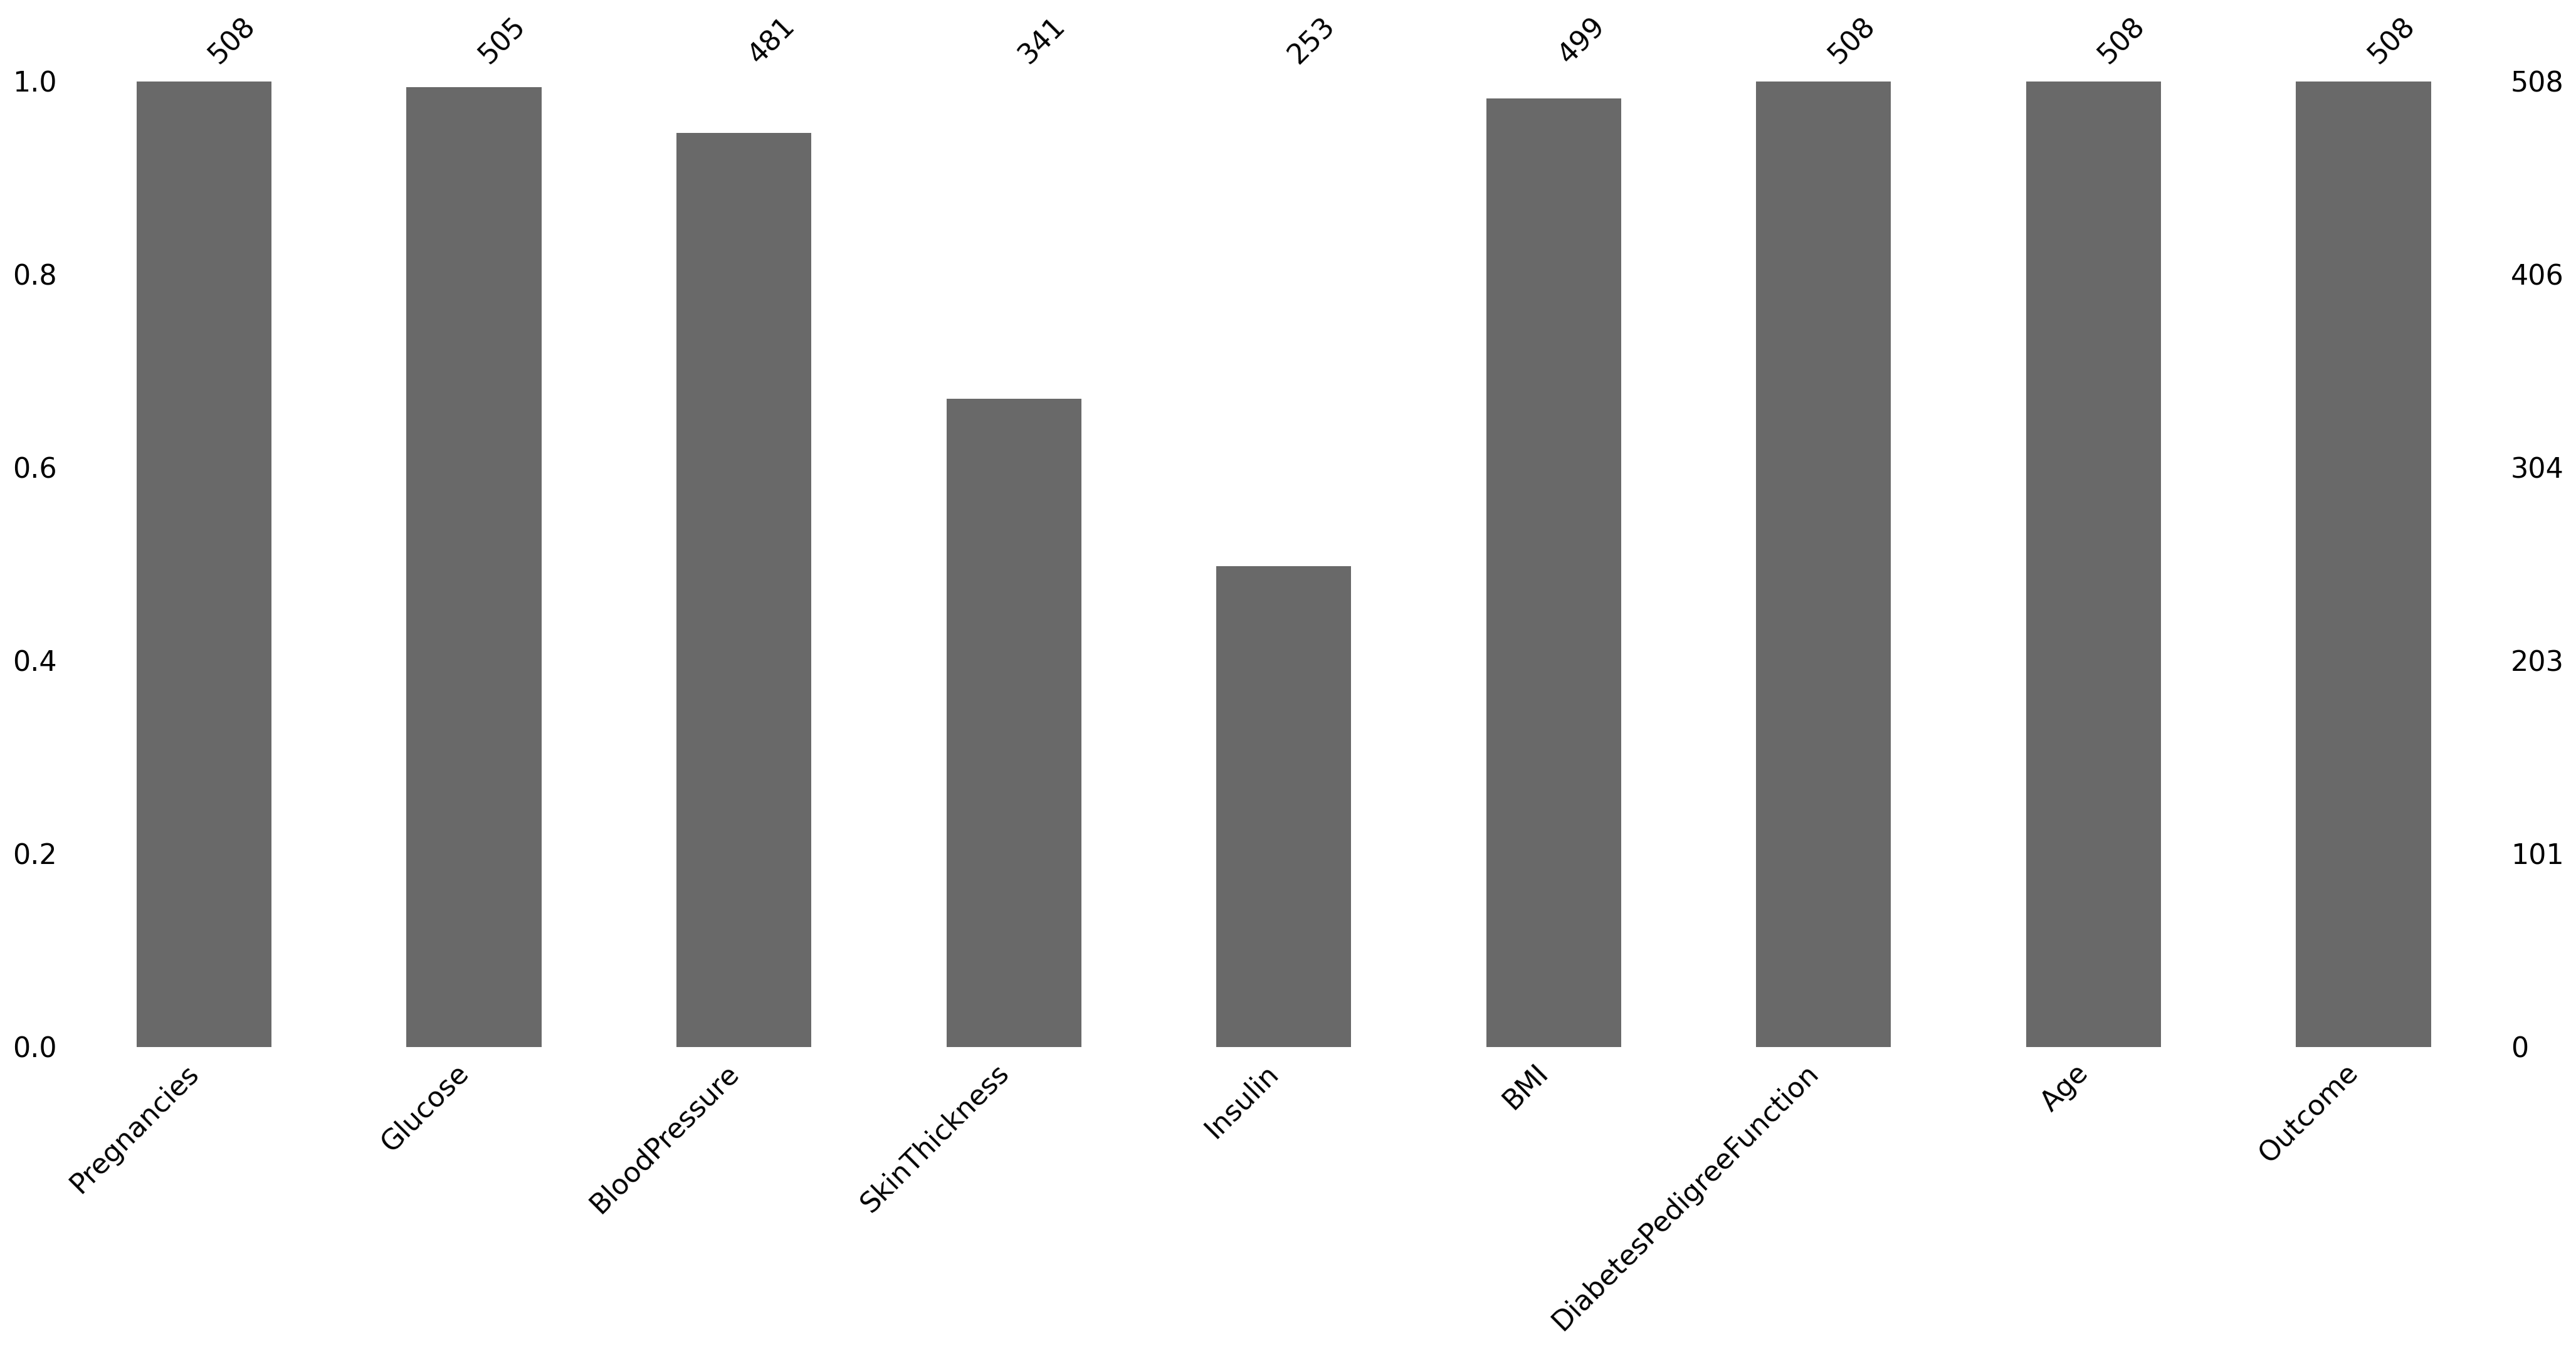

In [ ]:
import missingno as msno
msno.bar(diabetes_df);

In [ ]:
def median_target(var):

    temp = diabetes_df[diabetes_df[var].notnull()]

    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()

    return temp

In [ ]:
columns_ = diabetes_df.columns

columns = columns_.drop("Outcome")

In [ ]:
columns



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
median_target('Glucose')


Outcome  Glucose
0        0   108.50
1        1   141.00

In [ ]:
columns = diabetes_df.columns

columns = columns.drop("Outcome")

for col in columns:

    diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df[col].isnull()), col] = median_target(col)[col][0]
    diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df[col].isnull()), col] = median_target(col)[col][1]

In [ ]:
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df["Pregnancies"].isnull()), "Pregnancies"]

Series([], Name: Pregnancies, dtype: int64)

In [ ]:
diabetes_df[(diabetes_df['Outcome'] == 0 ) & (diabetes_df["BloodPressure"].isnull())]


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [ ]:
Q1 = diabetes_df["BloodPressure"].quantile(0.01)
Q3 = diabetes_df["BloodPressure"].quantile(0.99)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [ ]:
lower


np.float64(-51.79000000000002)

In [ ]:
upper


np.float64(203.65000000000003)

In [ ]:
def remove_all_categorical_columns(df):

    categorical_cols = df.select_dtypes(include=['category', 'object']).columns
    df = df.drop(columns=categorical_cols)
    return df

diabetes_df = remove_all_categorical_columns(diabetes_df)

In [ ]:
diabetes_df[(diabetes_df["BloodPressure"] > upper)].any(axis=None)


np.False_

In [ ]:
for feature in diabetes_df:
    print(feature)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [ ]:
for feature in diabetes_df.select_dtypes(include=np.number):
    Q1 = diabetes_df[feature].quantile(0.01)
    Q3 = diabetes_df[feature].quantile(0.99)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    diabetes_df = diabetes_df[~((diabetes_df[feature] < lower) | (diabetes_df[feature] > upper))]

diabetes_df.shape

(508, 9)

In [ ]:
diabetes_df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
503            7   179.00          95.00          31.00   105.00 34.20   
504            0   113.00          76.00          32.00   180.00 33.30   
505            3   128.00          72.00          25.00   190.00 32.40   
506            1   119.00          88.00          41.00   170.00 45.30   
507            3    84.00          72.00          32.00   105.00 37.20   

     DiabetesPedigreeFunction  Age  Outcome  
503                      0.16   60        0  
504                      0.28   23        1  
505                      0.55   27        1  
506                      0.51   26        0  
507                      0.27   28        0

In [ ]:
diabetes_df.shape

(508, 9)

In [ ]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

diabetes_df["NewBMI"] = NewBMI

diabetes_df.loc[diabetes_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

diabetes_df.loc[(diabetes_df["BMI"] > 18.5) & (diabetes_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes_df.loc[(diabetes_df["BMI"] > 24.9) & (diabetes_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes_df.loc[(diabetes_df["BMI"] > 29.9) & (diabetes_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes_df.loc[(diabetes_df["BMI"] > 34.9) & (diabetes_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes_df.loc[diabetes_df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
diabetes_df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4   183.00          74.00          32.00   180.00 28.40   
1            5   162.00         104.00          32.00   180.00 37.70   
2            2   197.00          70.00          99.00   180.00 34.70   
3           13   158.00         114.00          32.00   180.00 42.30   
4            0   162.00          76.00          56.00   100.00 53.20   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI  
0                      0.21   36        1  Overweight  
1                      0.15   52        1   Obesity 2  
2                      0.57   62        1   Obesity 1  
3                      0.26   44        1   Obesity 3  
4                      0.76   25        1   Obesity 3

In [ ]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
diabetes_df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4   183.00          74.00          32.00   180.00 28.40   
1            5   162.00         104.00          32.00   180.00 37.70   
2            2   197.00          70.00          99.00   180.00 34.70   
3           13   158.00         114.00          32.00   180.00 42.30   
4            0   162.00          76.00          56.00   100.00 53.20   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI  
0                      0.21   36        1  Overweight  
1                      0.15   52        1   Obesity 2  
2                      0.57   62        1   Obesity 1  
3                      0.26   44        1   Obesity 3  
4                      0.76   25        1   Obesity 3

In [ ]:
diabetes_df["NewInsulinScore"] = diabetes_df.apply(set_insulin, axis=1)

In [ ]:
diabetes_df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4   183.00          74.00          32.00   180.00 28.40   
1            5   162.00         104.00          32.00   180.00 37.70   
2            2   197.00          70.00          99.00   180.00 34.70   
3           13   158.00         114.00          32.00   180.00 42.30   
4            0   162.00          76.00          56.00   100.00 53.20   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI NewInsulinScore  
0                      0.21   36        1  Overweight        Abnormal  
1                      0.15   52        1   Obesity 2        Abnormal  
2                      0.57   62        1   Obesity 1        Abnormal  
3                      0.26   44        1   Obesity 3        Abnormal  
4                      0.76   25        1   Obesity 3          Normal

In [ ]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

diabetes_df["NewGlucose"] = NewGlucose

diabetes_df.loc[diabetes_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

diabetes_df.loc[(diabetes_df["Glucose"] > 70) & (diabetes_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

diabetes_df.loc[(diabetes_df["Glucose"] > 99) & (diabetes_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

diabetes_df.loc[diabetes_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
diabetes_df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4   183.00          74.00          32.00   180.00 28.40   
1            5   162.00         104.00          32.00   180.00 37.70   
2            2   197.00          70.00          99.00   180.00 34.70   
3           13   158.00         114.00          32.00   180.00 42.30   
4            0   162.00          76.00          56.00   100.00 53.20   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI NewInsulinScore  \
0                      0.21   36        1  Overweight        Abnormal   
1                      0.15   52        1   Obesity 2        Abnormal   
2                      0.57   62        1   Obesity 1        Abnormal   
3                      0.26   44        1   Obesity 3        Abnormal   
4                      0.76   25        1   Obesity 3          Normal   

  NewGlucose  
0     Secret  
1     Secret  
2     Secret  
3     Secret  
4     Secret

In [ ]:
diabetes_df = pd.get_dummies(diabetes_df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
diabetes_df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4   183.00          74.00          32.00   180.00 28.40   
1            5   162.00         104.00          32.00   180.00 37.70   
2            2   197.00          70.00          99.00   180.00 34.70   
3           13   158.00         114.00          32.00   180.00 42.30   
4            0   162.00          76.00          56.00   100.00 53.20   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                      0.21   36        1             False             False   
1                      0.15   52        1             False              True   
2                      0.57   62        1              True             False   
3                      0.26   44        1             False             False   
4                      0.76   25        1             False             False   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0             False               True               False   
1             False              False               False   
2             False              False               False   
3              True              False               False   
4              True              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                   False           False              False   
1                   False           False              False   
2                   False           False              False   
3                   False           False              False   
4                    True           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                  False               True  
1                  False               True  
2                  False               True  
3                  False               True  
4                  False               True

In [ ]:
categorical_df = diabetes_df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
y = diabetes_df["Outcome"]
X = diabetes_df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [ ]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [ ]:
X.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4   183.00          74.00          32.00   180.00 28.40   
1            5   162.00         104.00          32.00   180.00 37.70   
2            2   197.00          70.00          99.00   180.00 34.70   
3           13   158.00         114.00          32.00   180.00 42.30   
4            0   162.00          76.00          56.00   100.00 53.20   

   DiabetesPedigreeFunction  Age  
0                      0.21   36  
1                      0.15   52  
2                      0.57   62  
3                      0.26   44  
4                      0.76   25

In [ ]:
cols


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
index


RangeIndex(start=0, stop=508, step=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cols, index=index)
X_scaled.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0         0.29     0.90           0.51           0.27     0.20 0.25   
1         0.36     0.77           0.82           0.27     0.20 0.47   
2         0.14     0.99           0.47           1.00     0.20 0.40   
3         0.93     0.74           0.92           0.27     0.20 0.58   
4         0.00     0.77           0.53           0.53     0.10 0.85   

   DiabetesPedigreeFunction  Age  
0                      0.06 0.25  
1                      0.03 0.52  
2                      0.21 0.68  
3                      0.08 0.38  
4                      0.29 0.07

In [ ]:
X.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4   183.00          74.00          32.00   180.00 28.40   
1            5   162.00         104.00          32.00   180.00 37.70   
2            2   197.00          70.00          99.00   180.00 34.70   
3           13   158.00         114.00          32.00   180.00 42.30   
4            0   162.00          76.00          56.00   100.00 53.20   

   DiabetesPedigreeFunction  Age  
0                      0.21   36  
1                      0.15   52  
2                      0.57   62  
3                      0.26   44  
4                      0.76   25

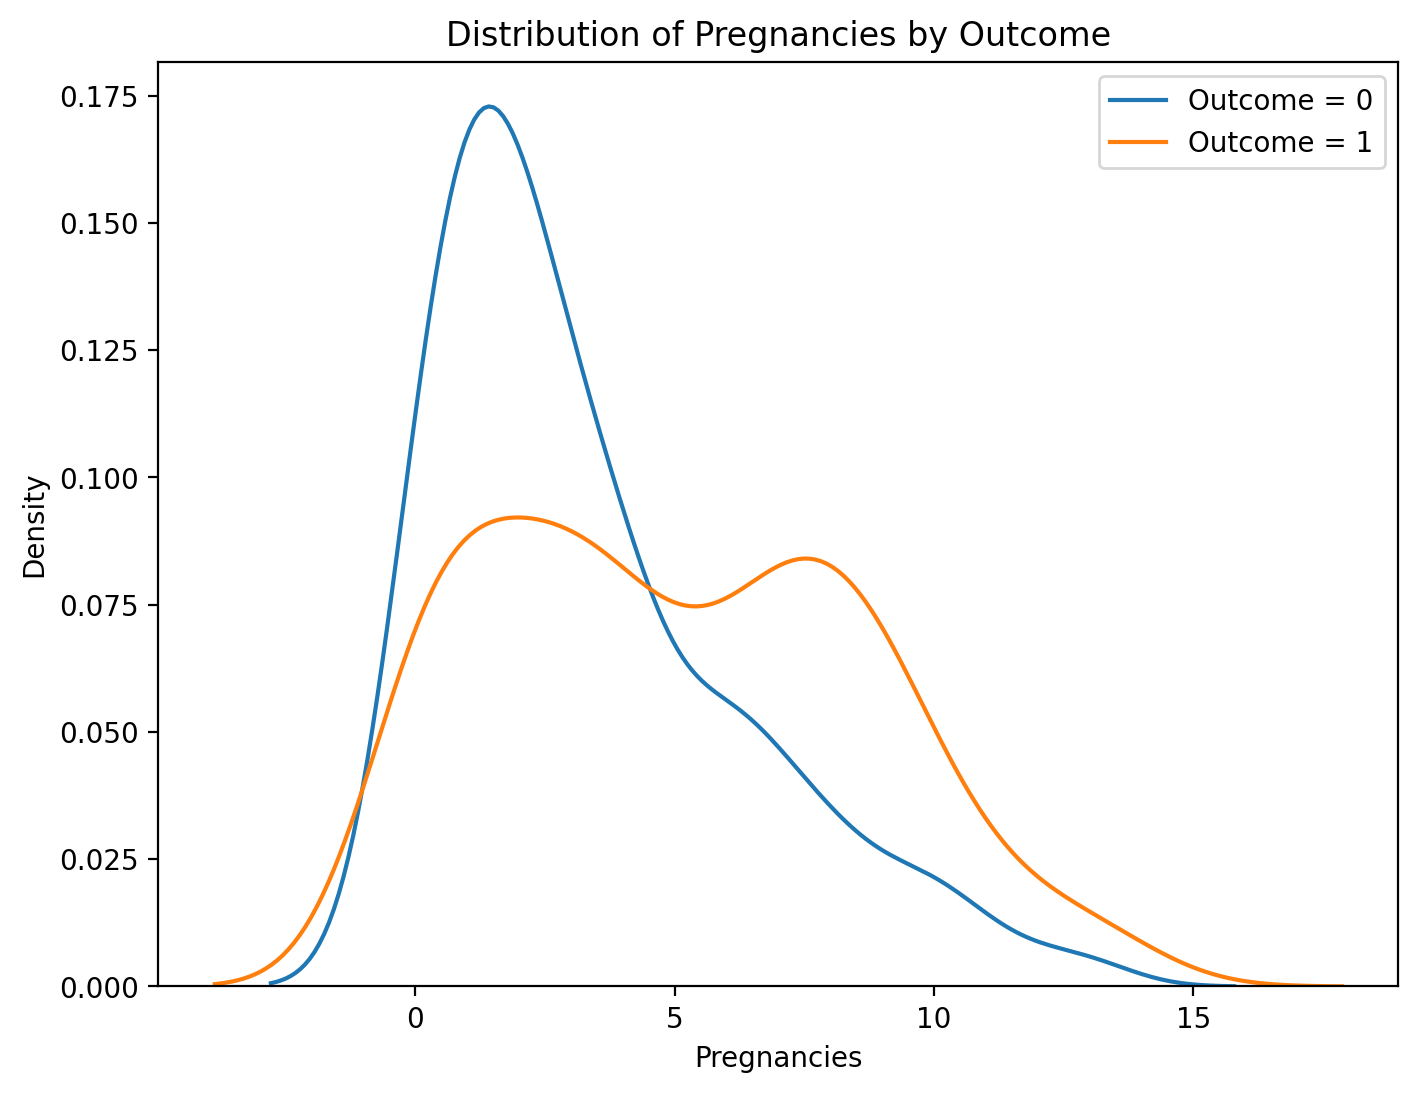

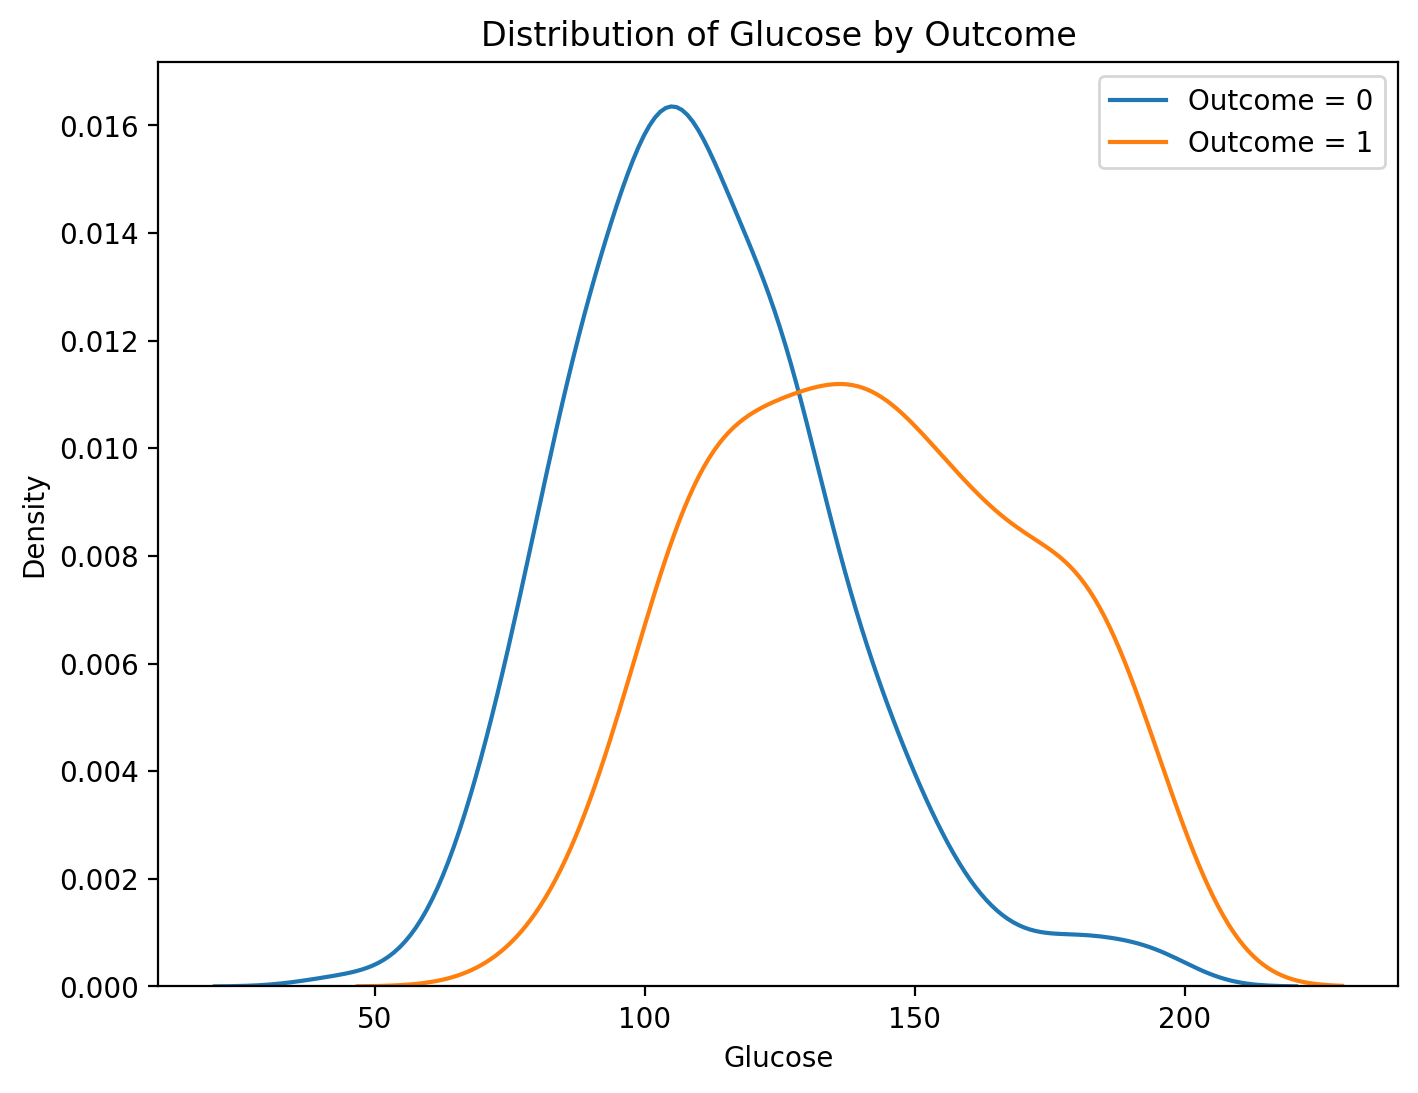

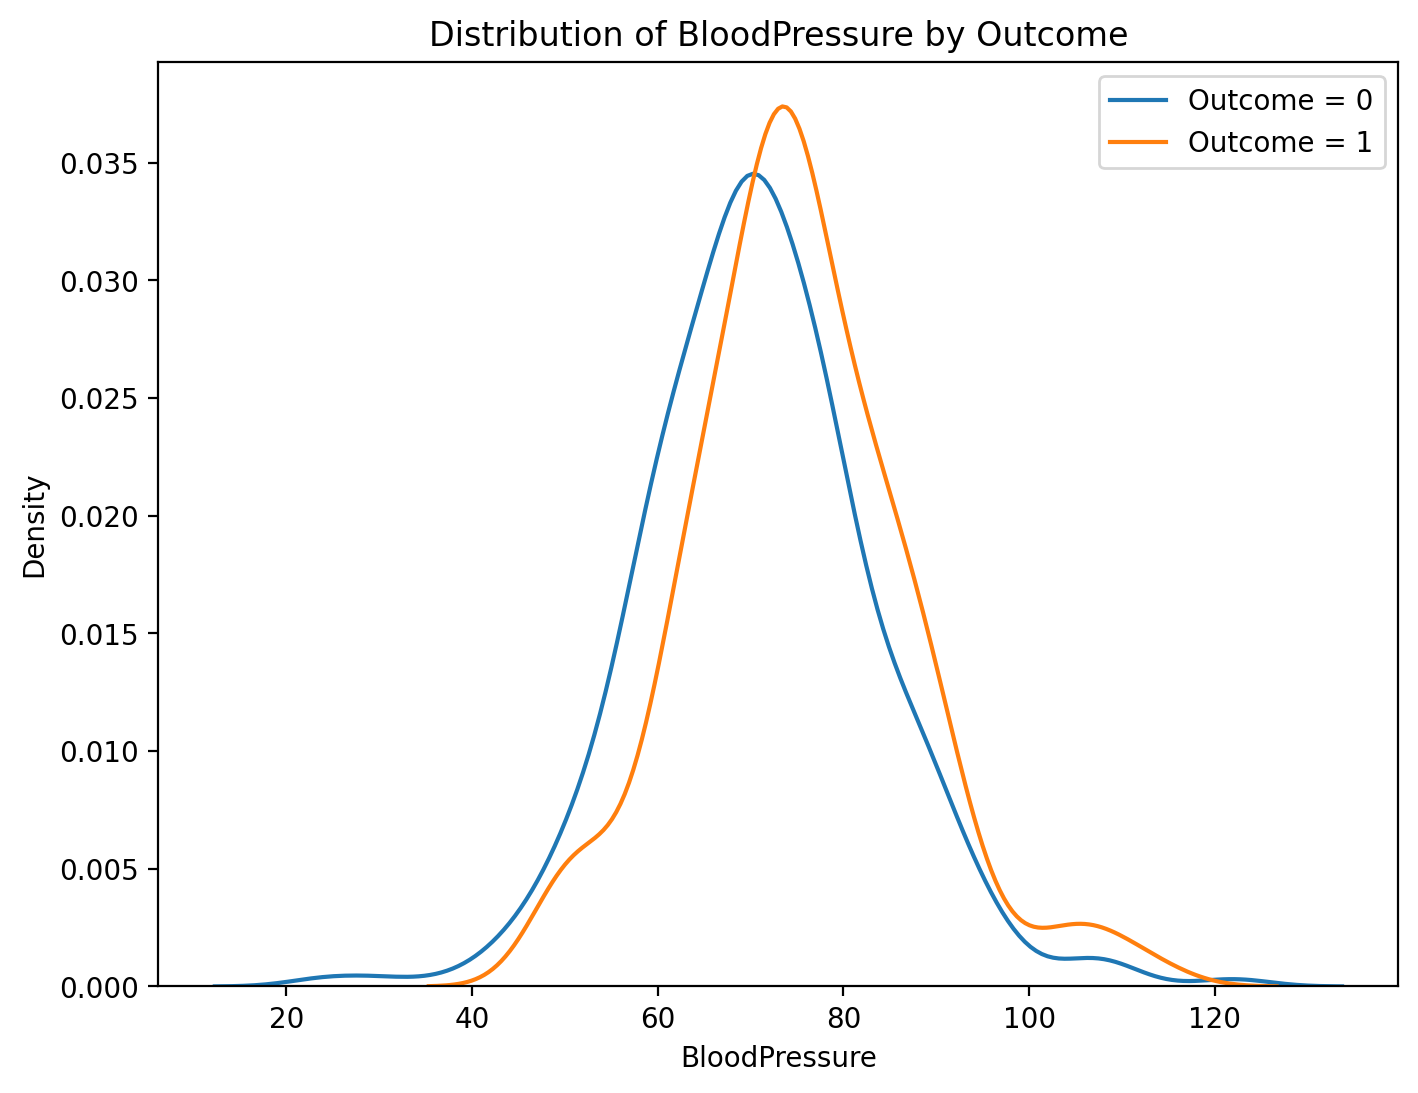

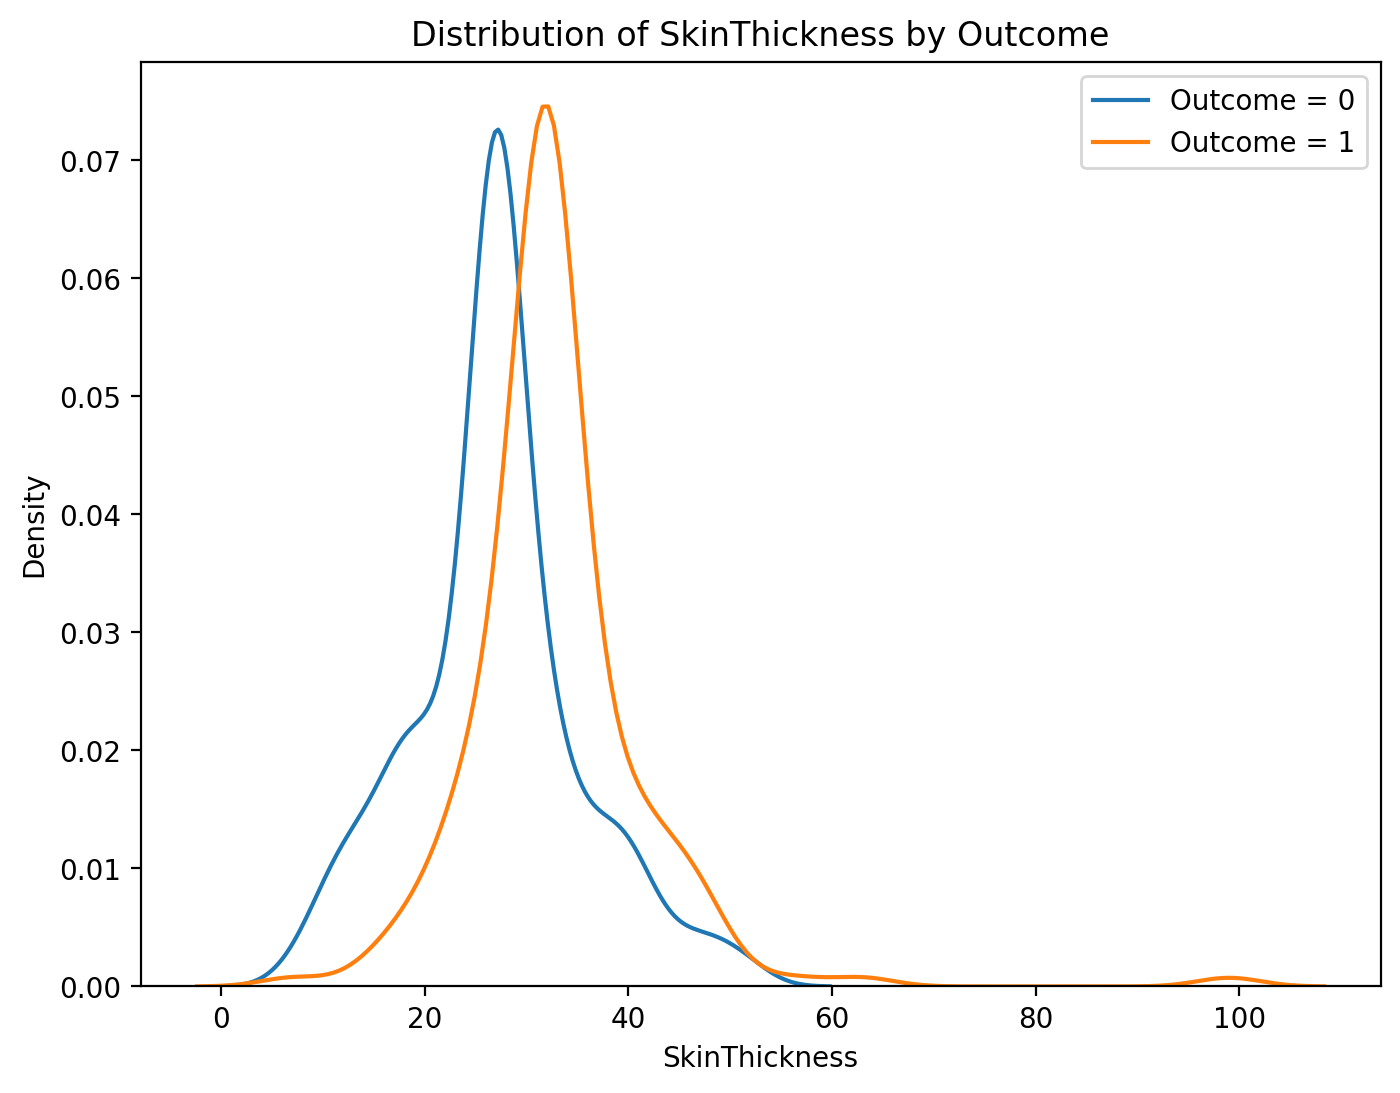

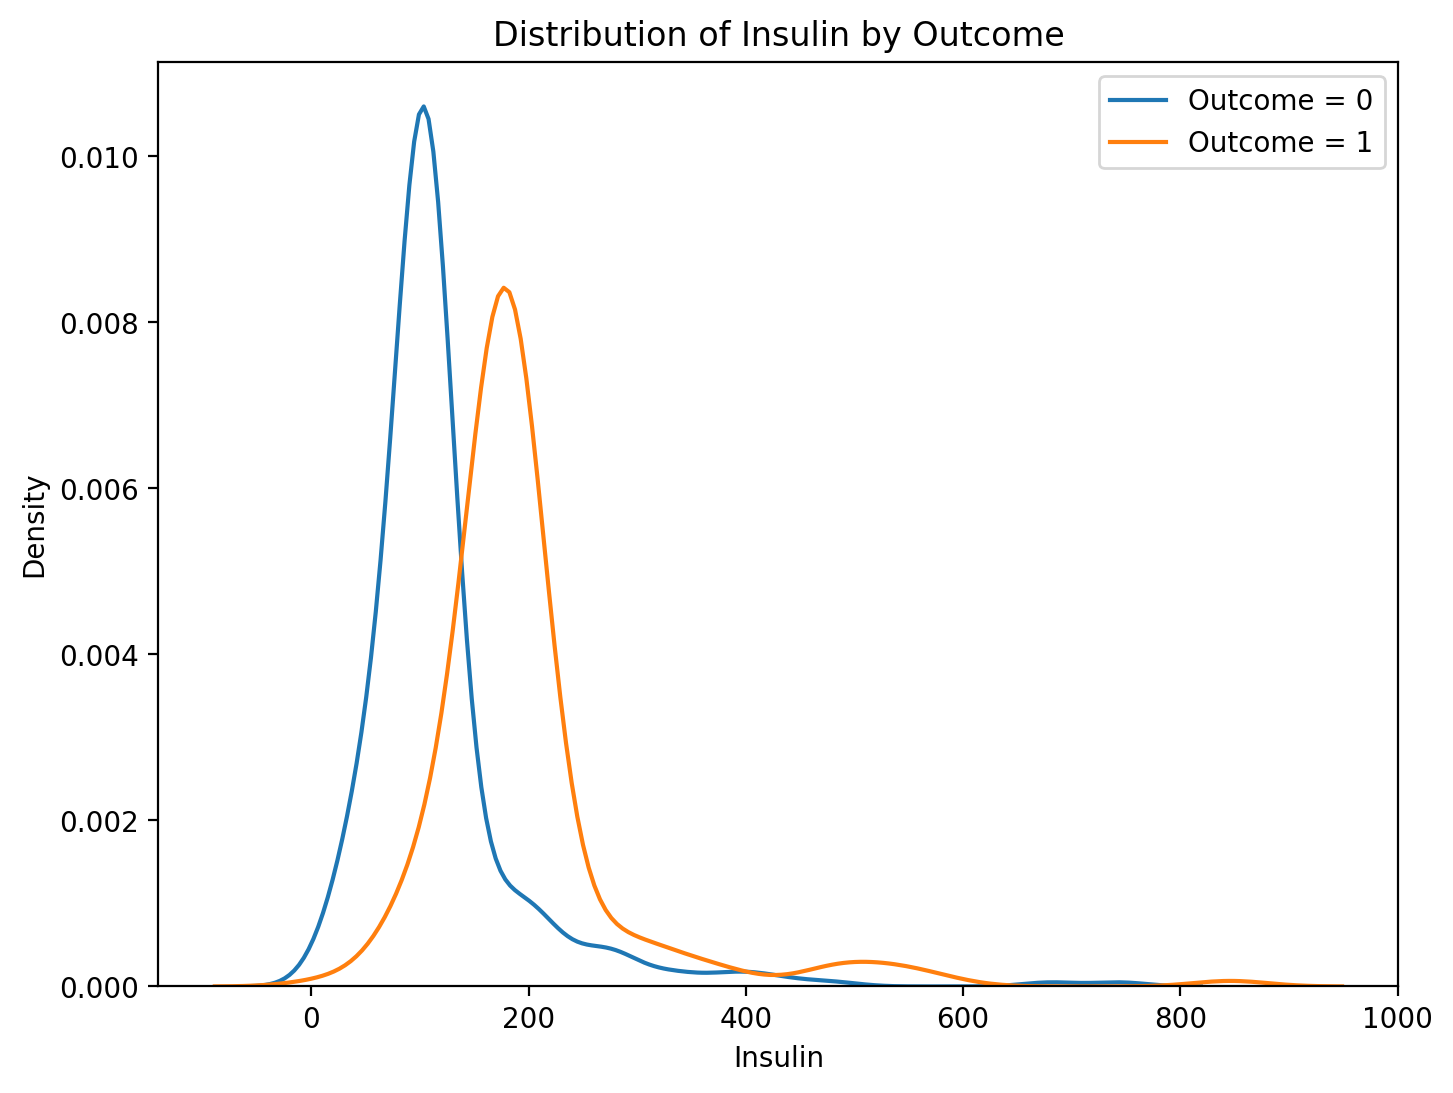

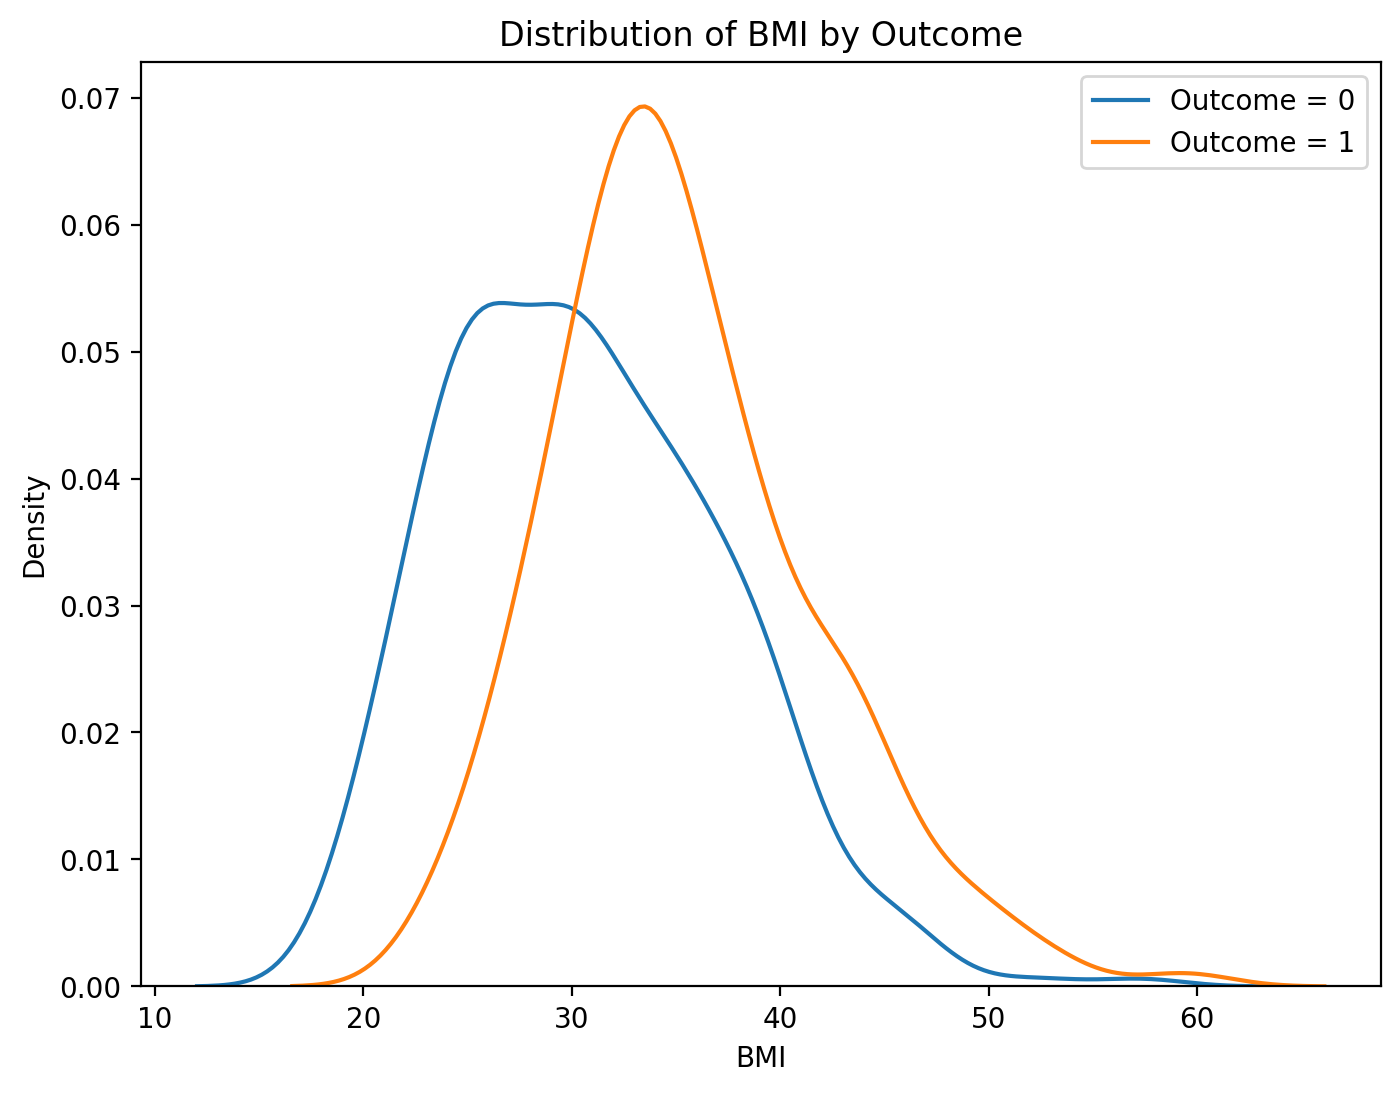

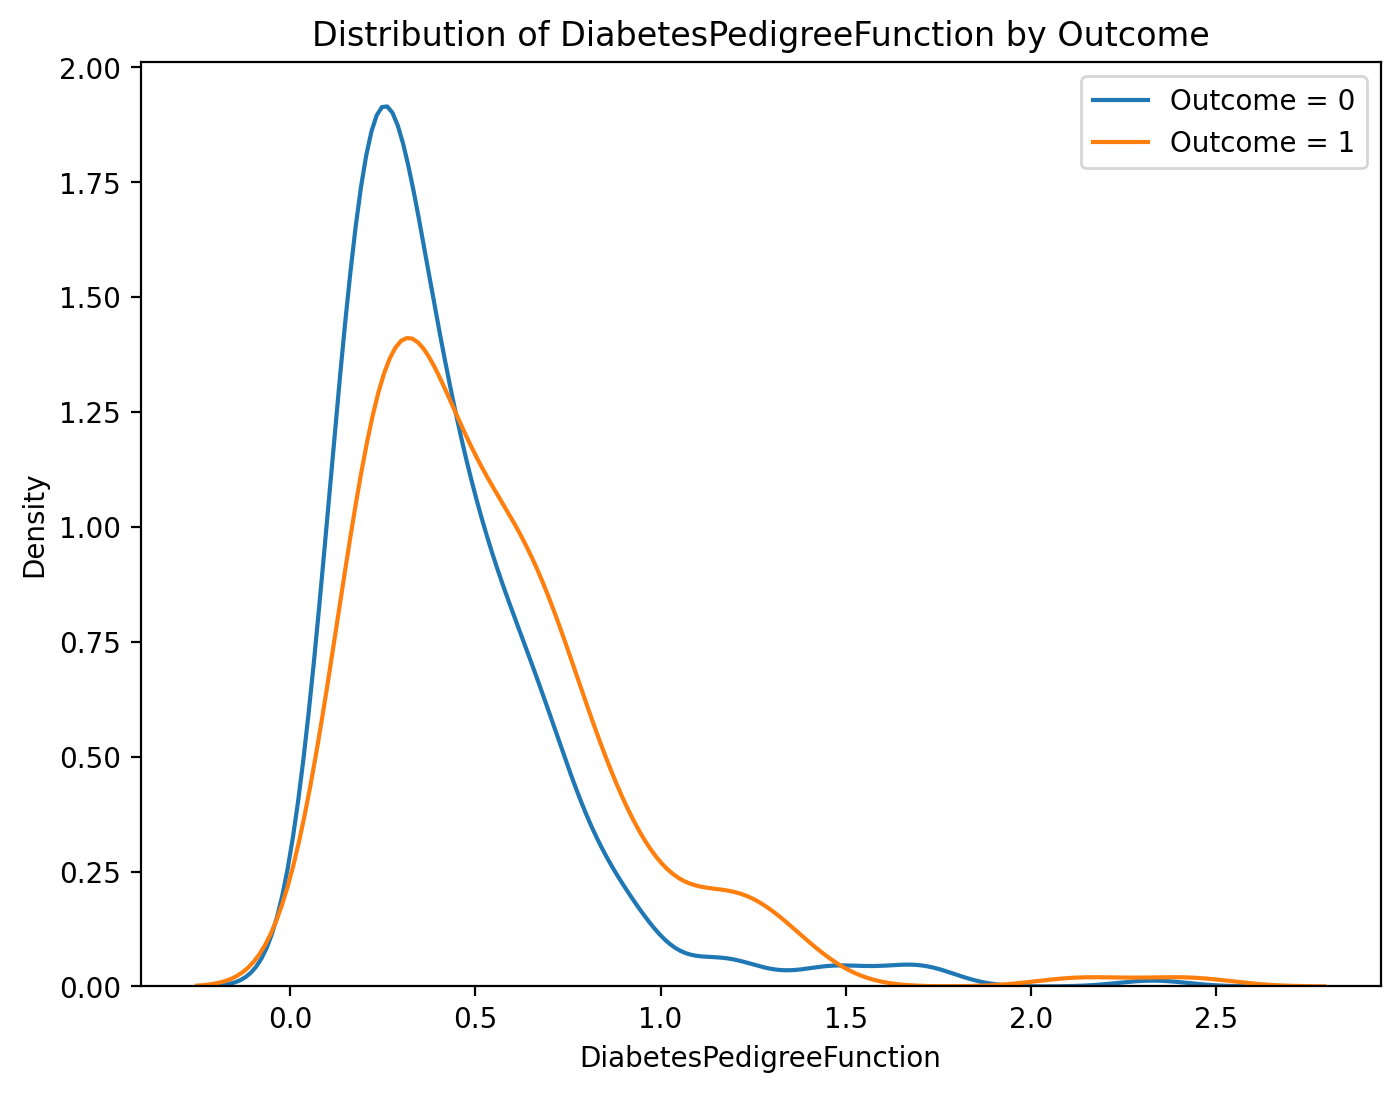

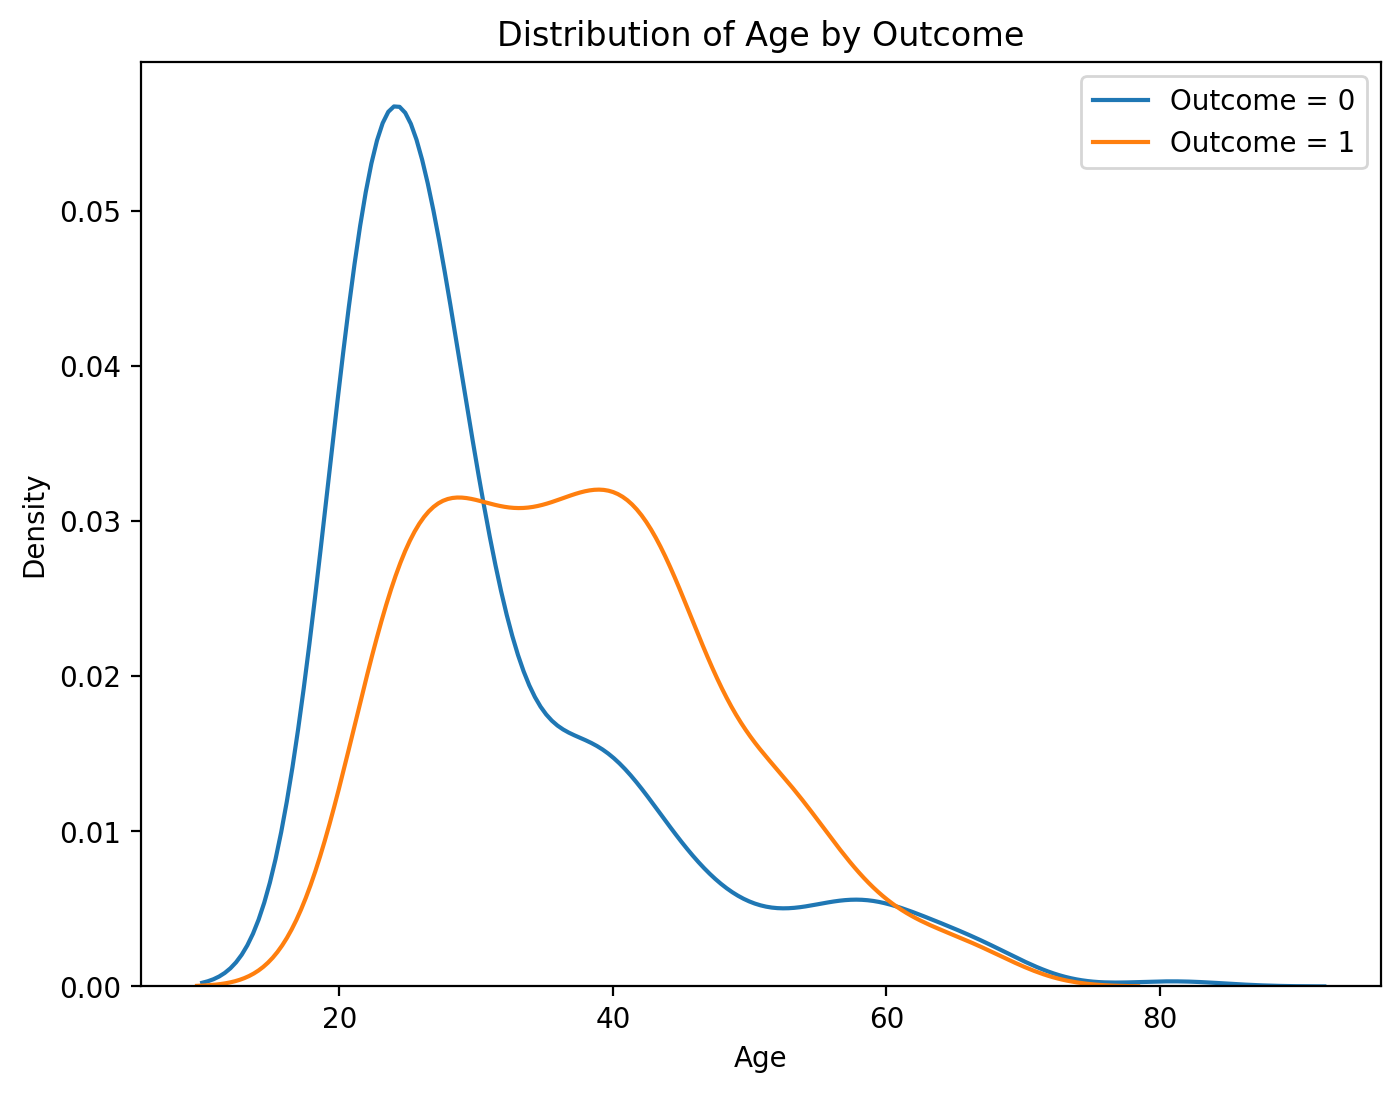

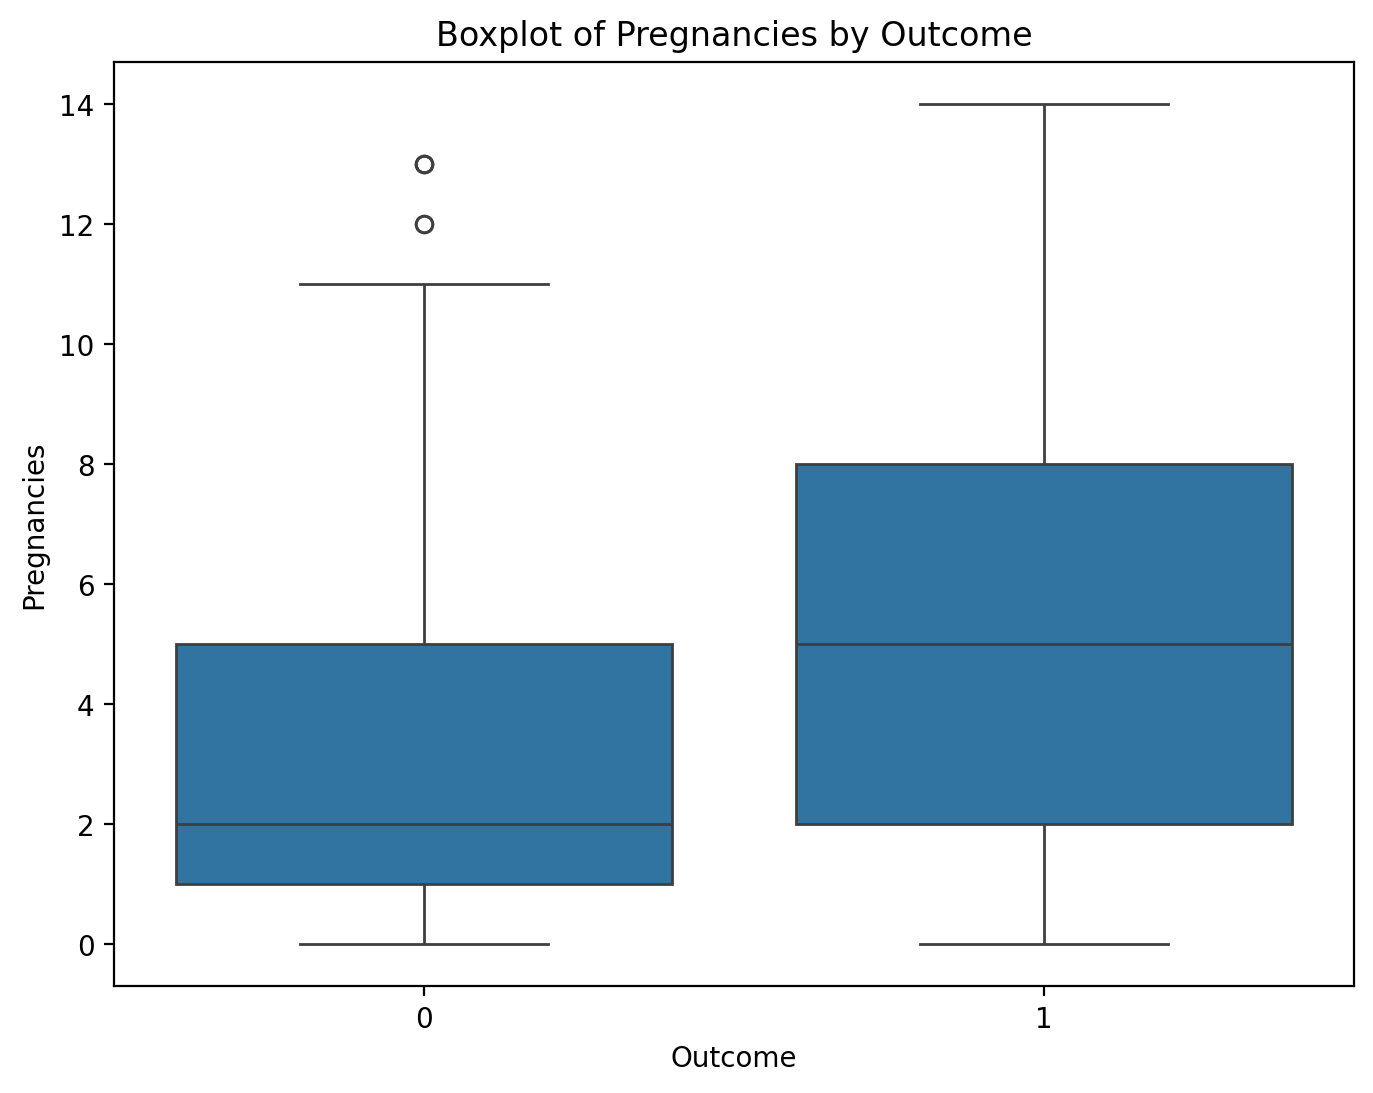

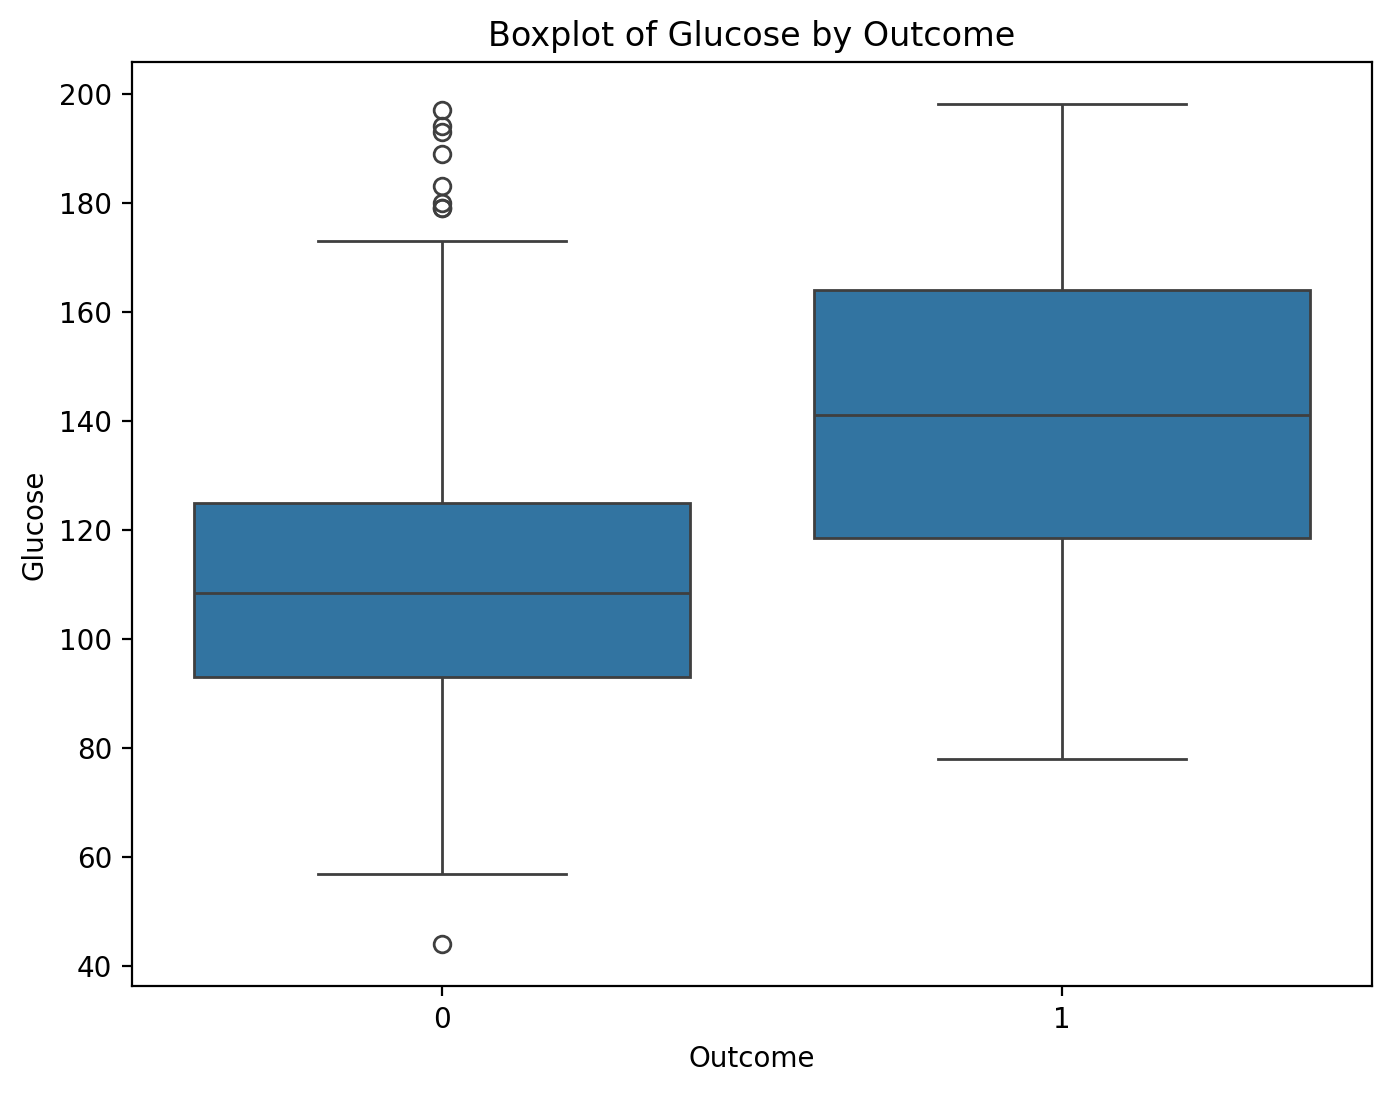

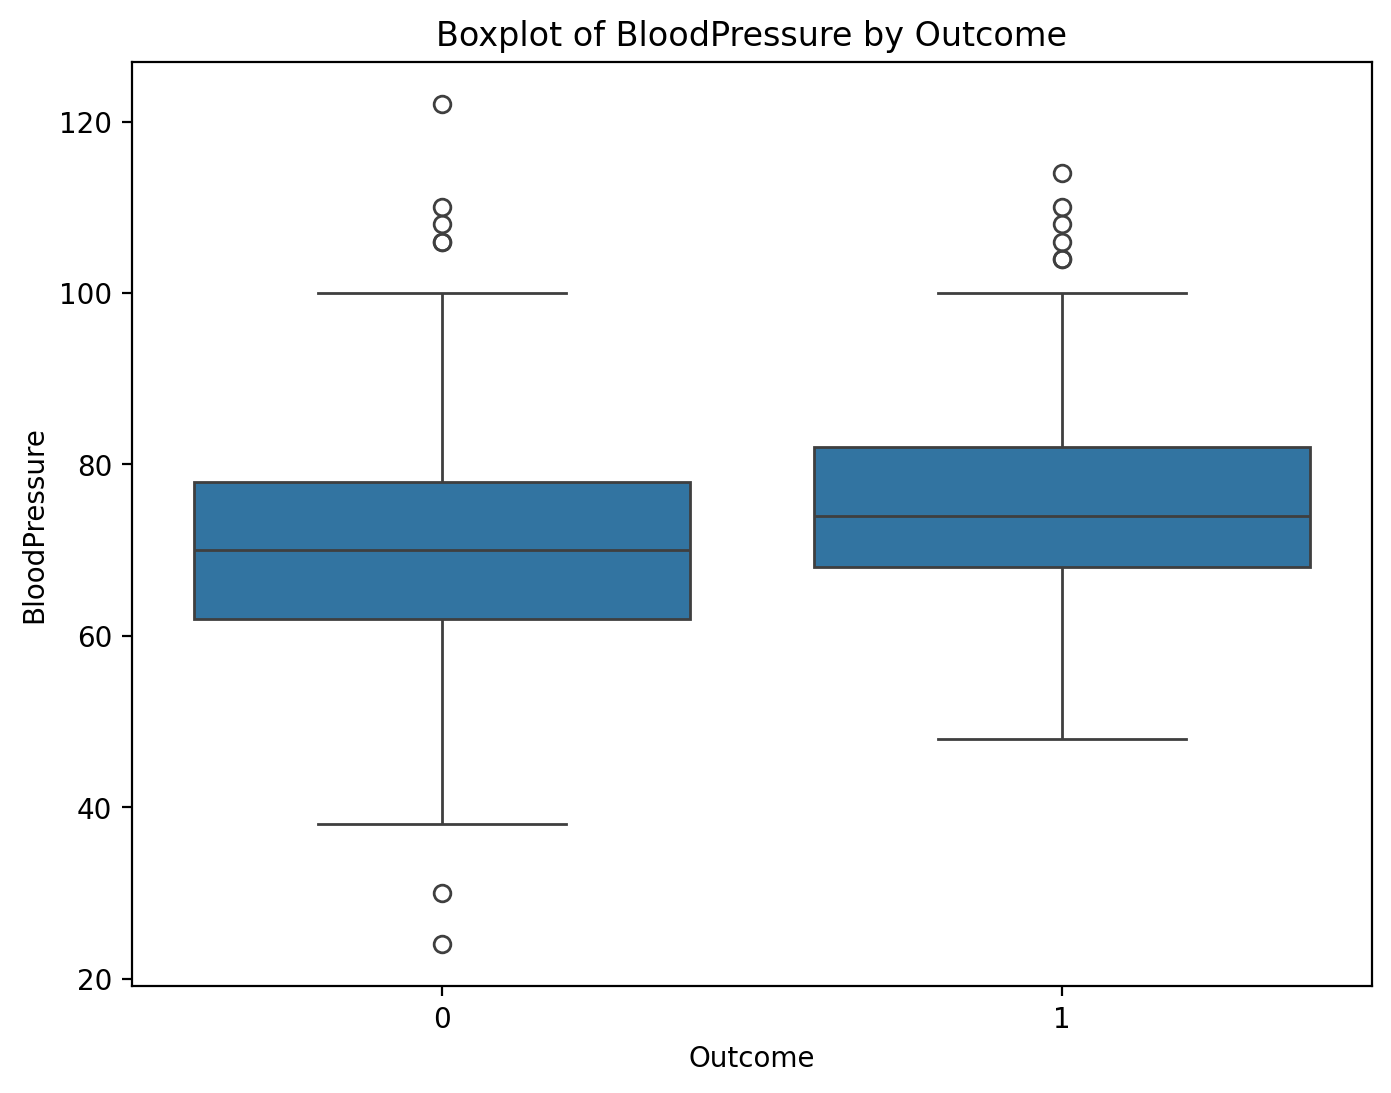

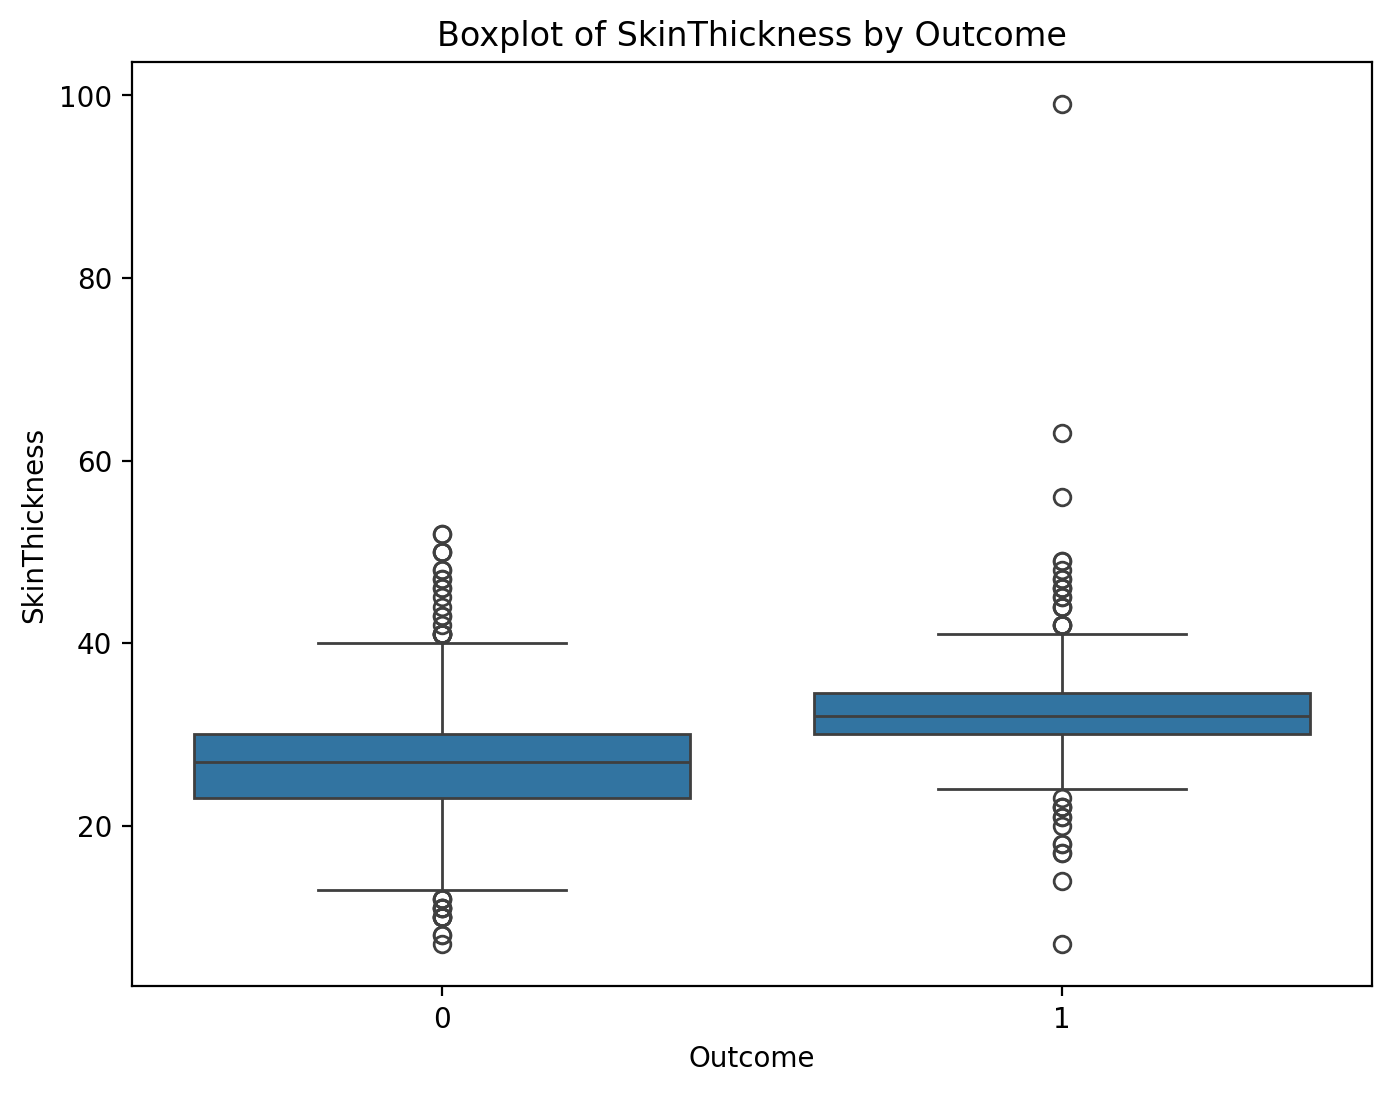

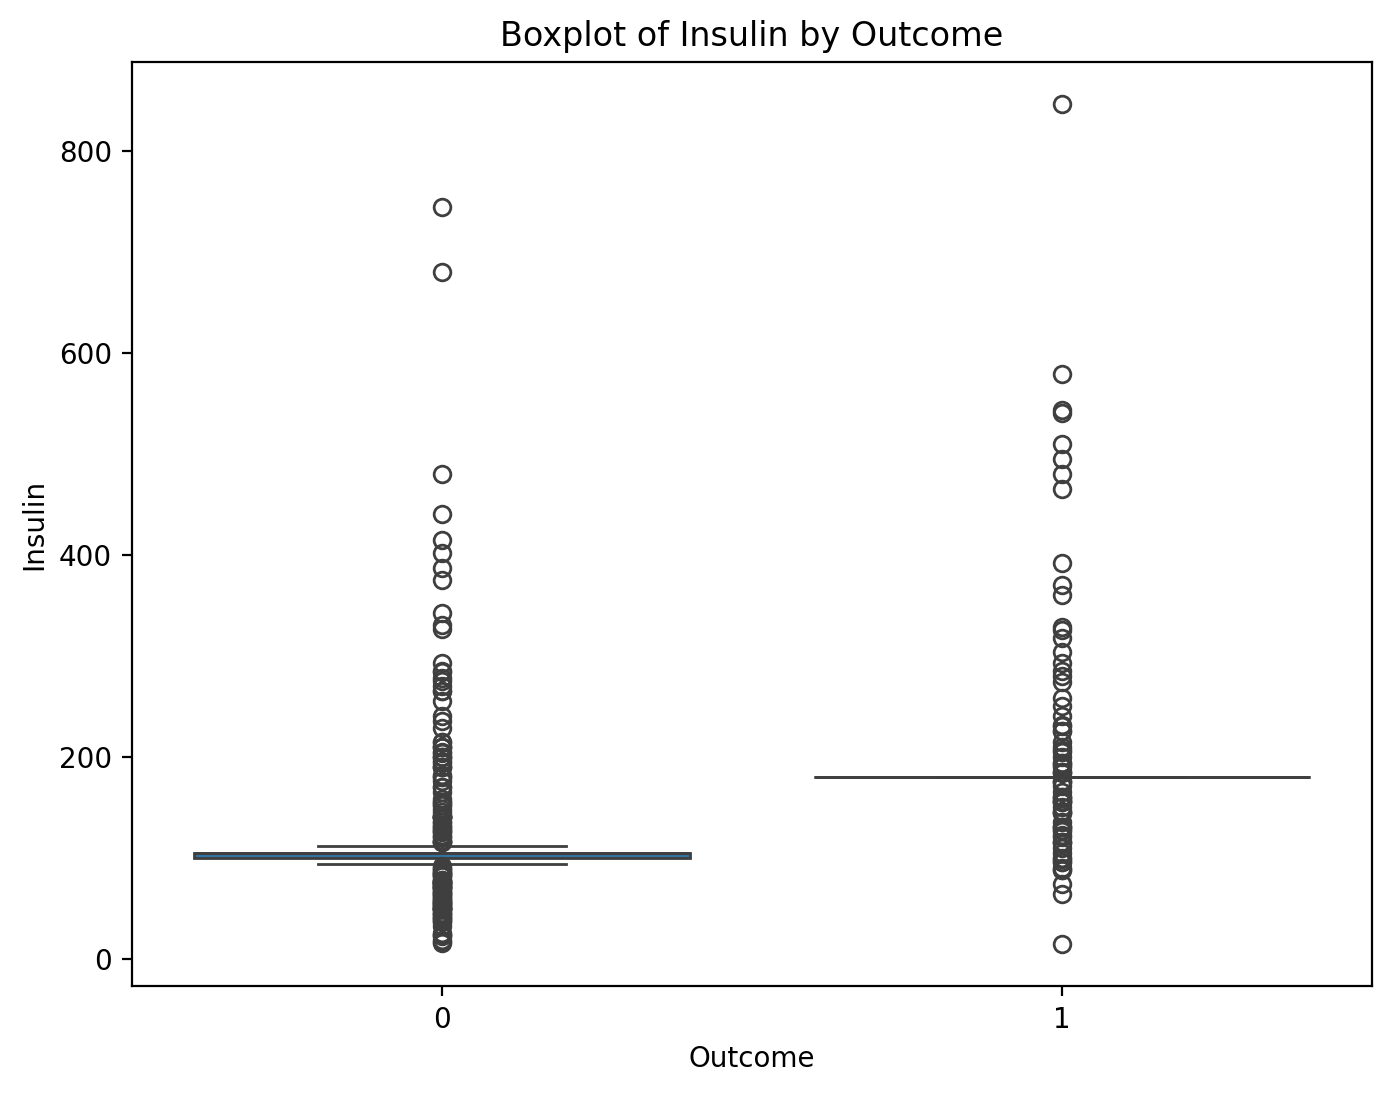

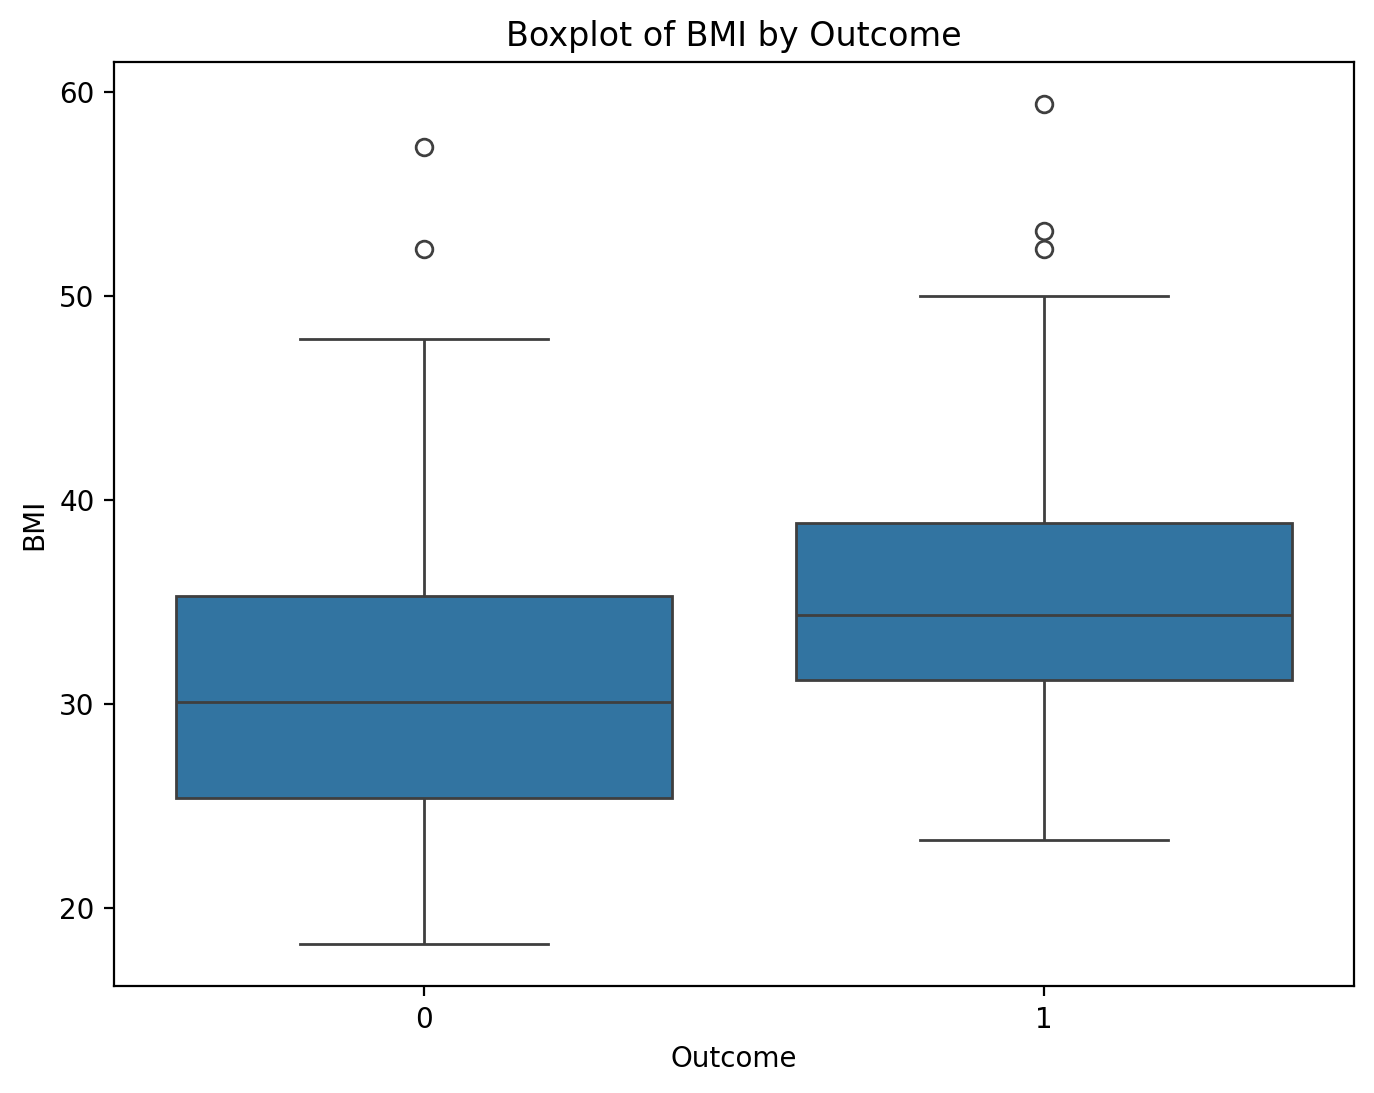

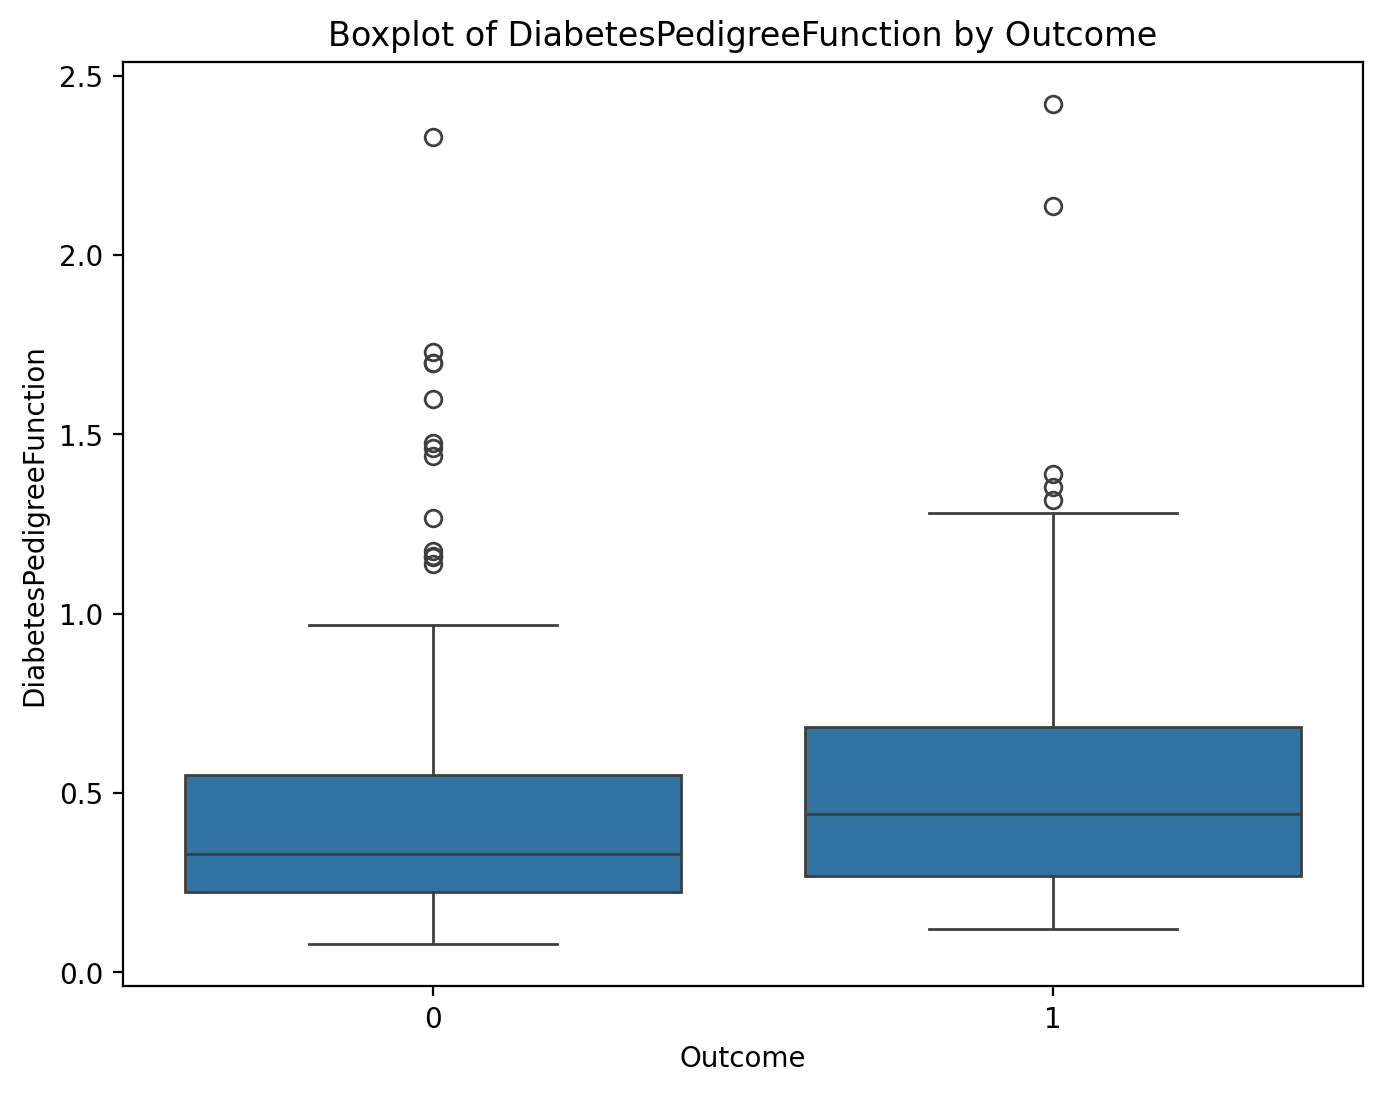

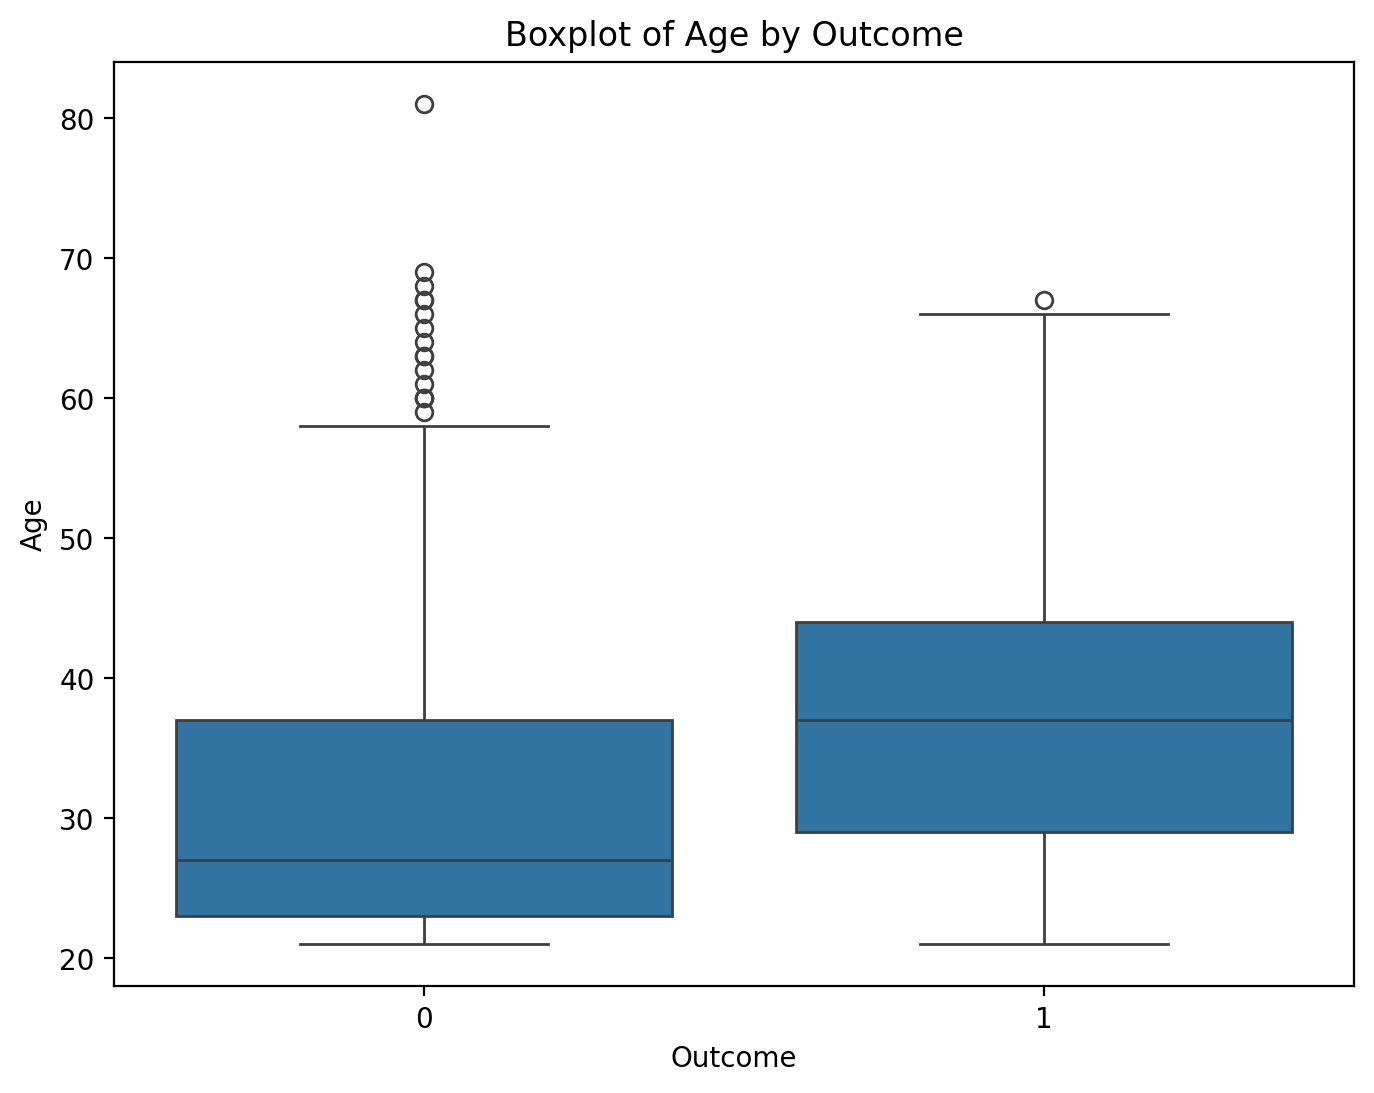

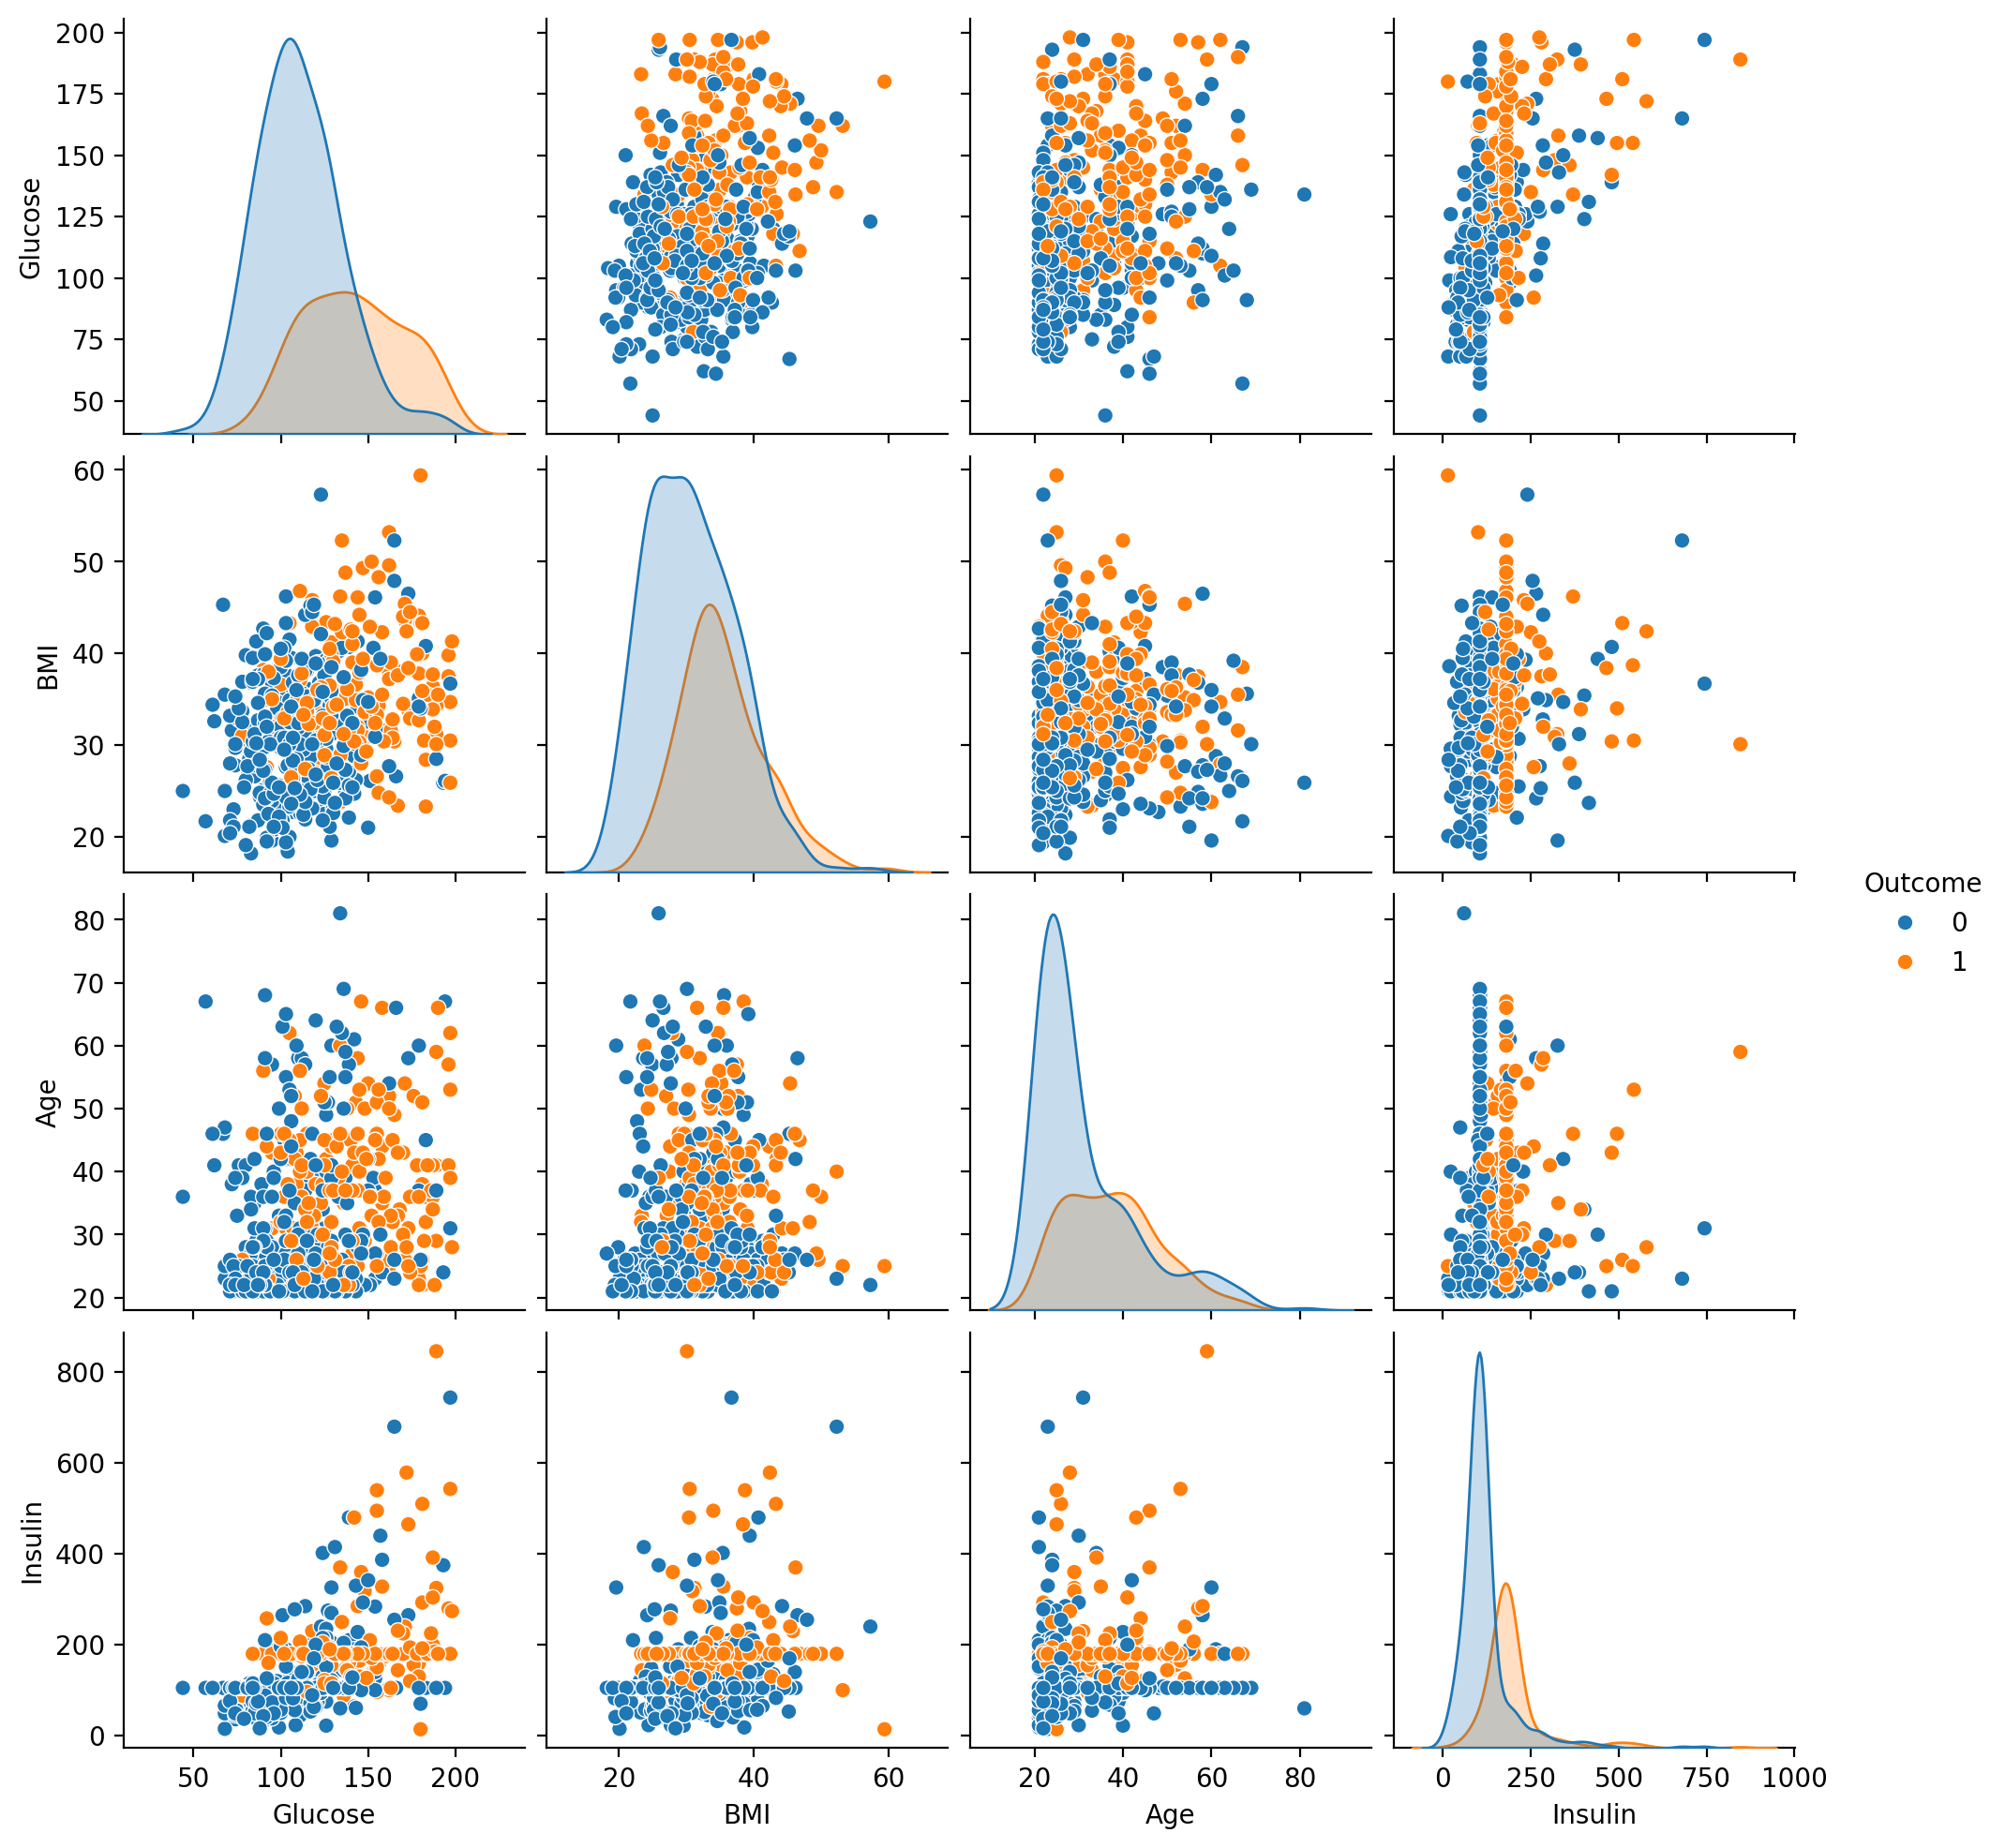

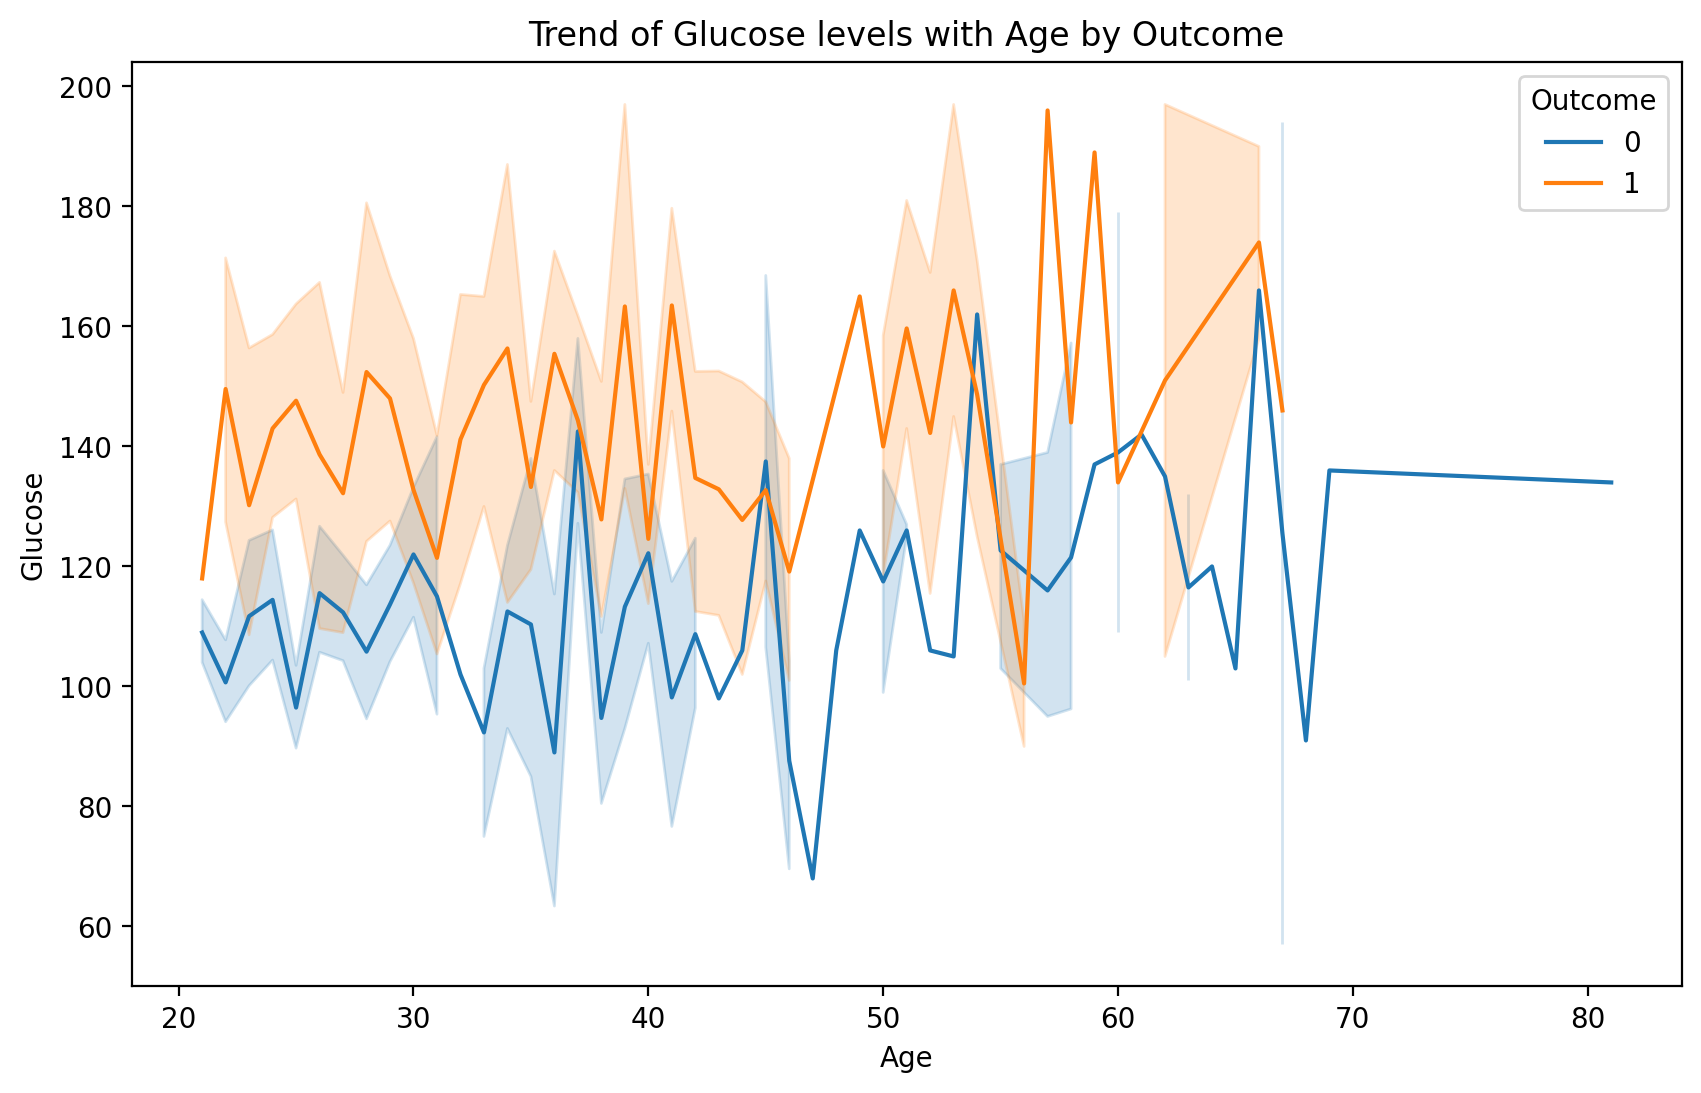

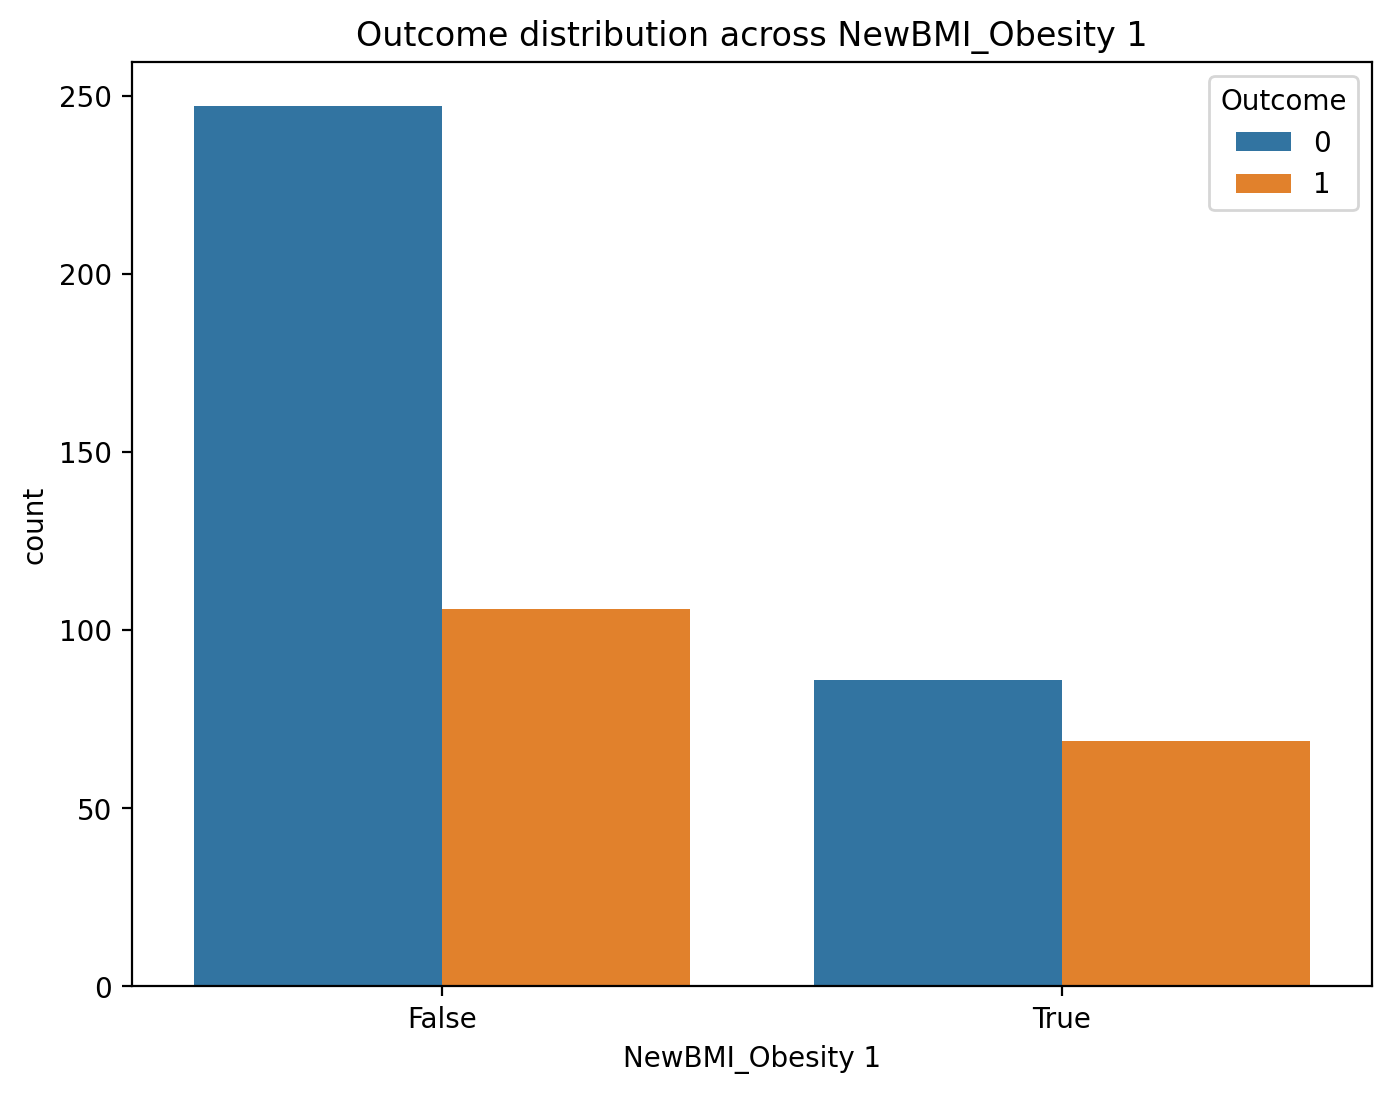

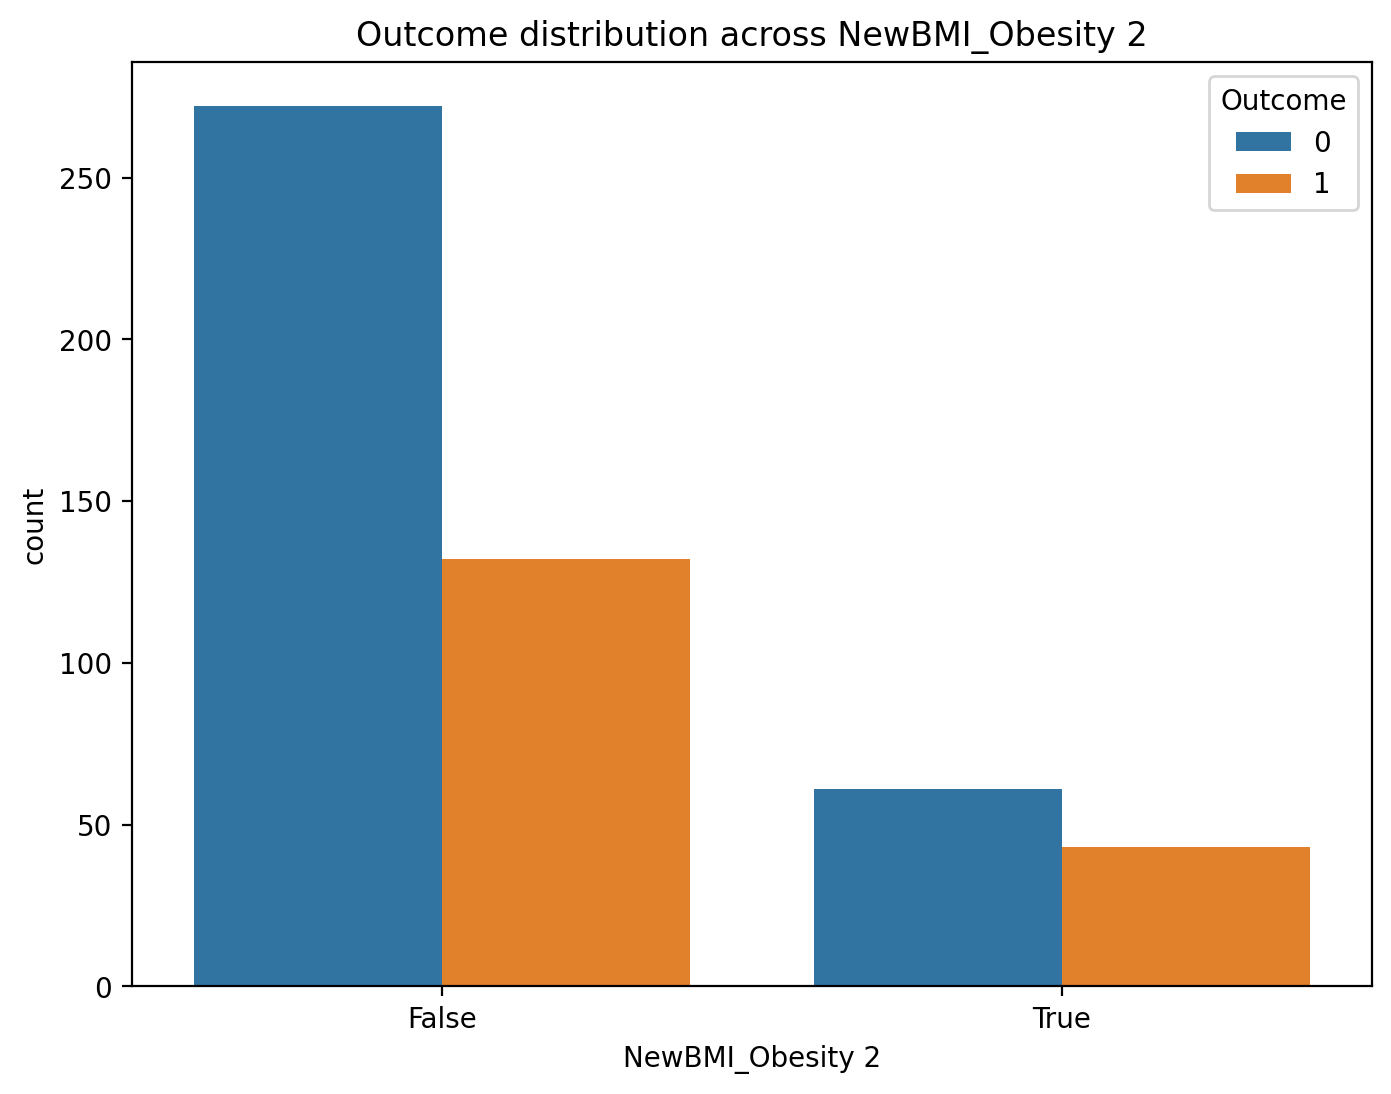

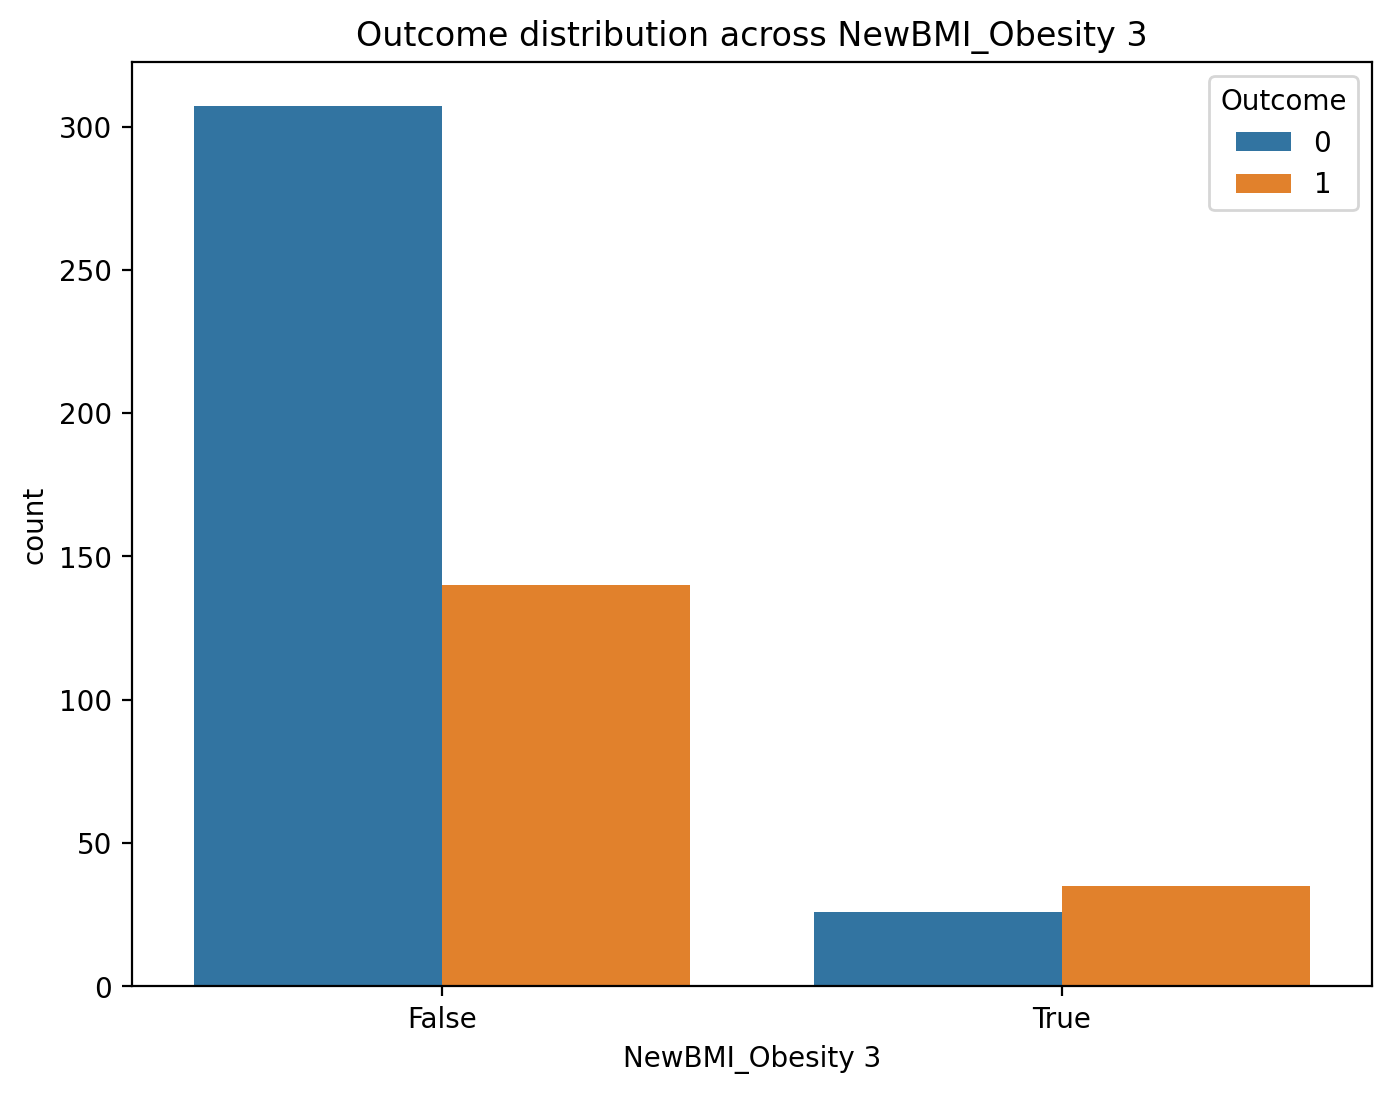

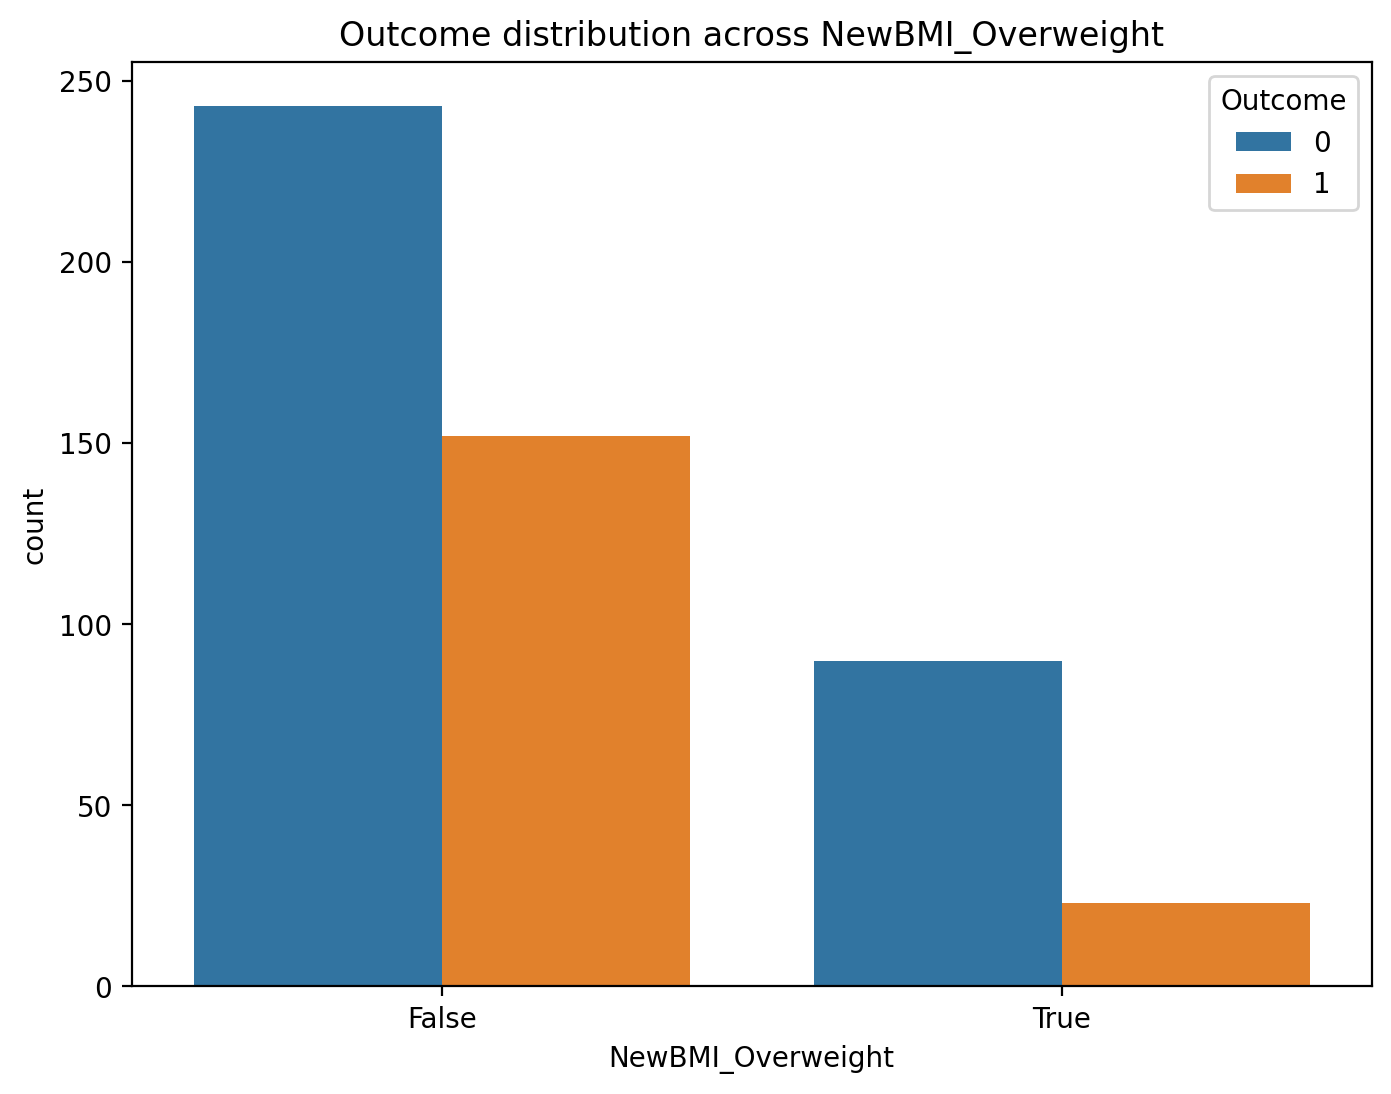

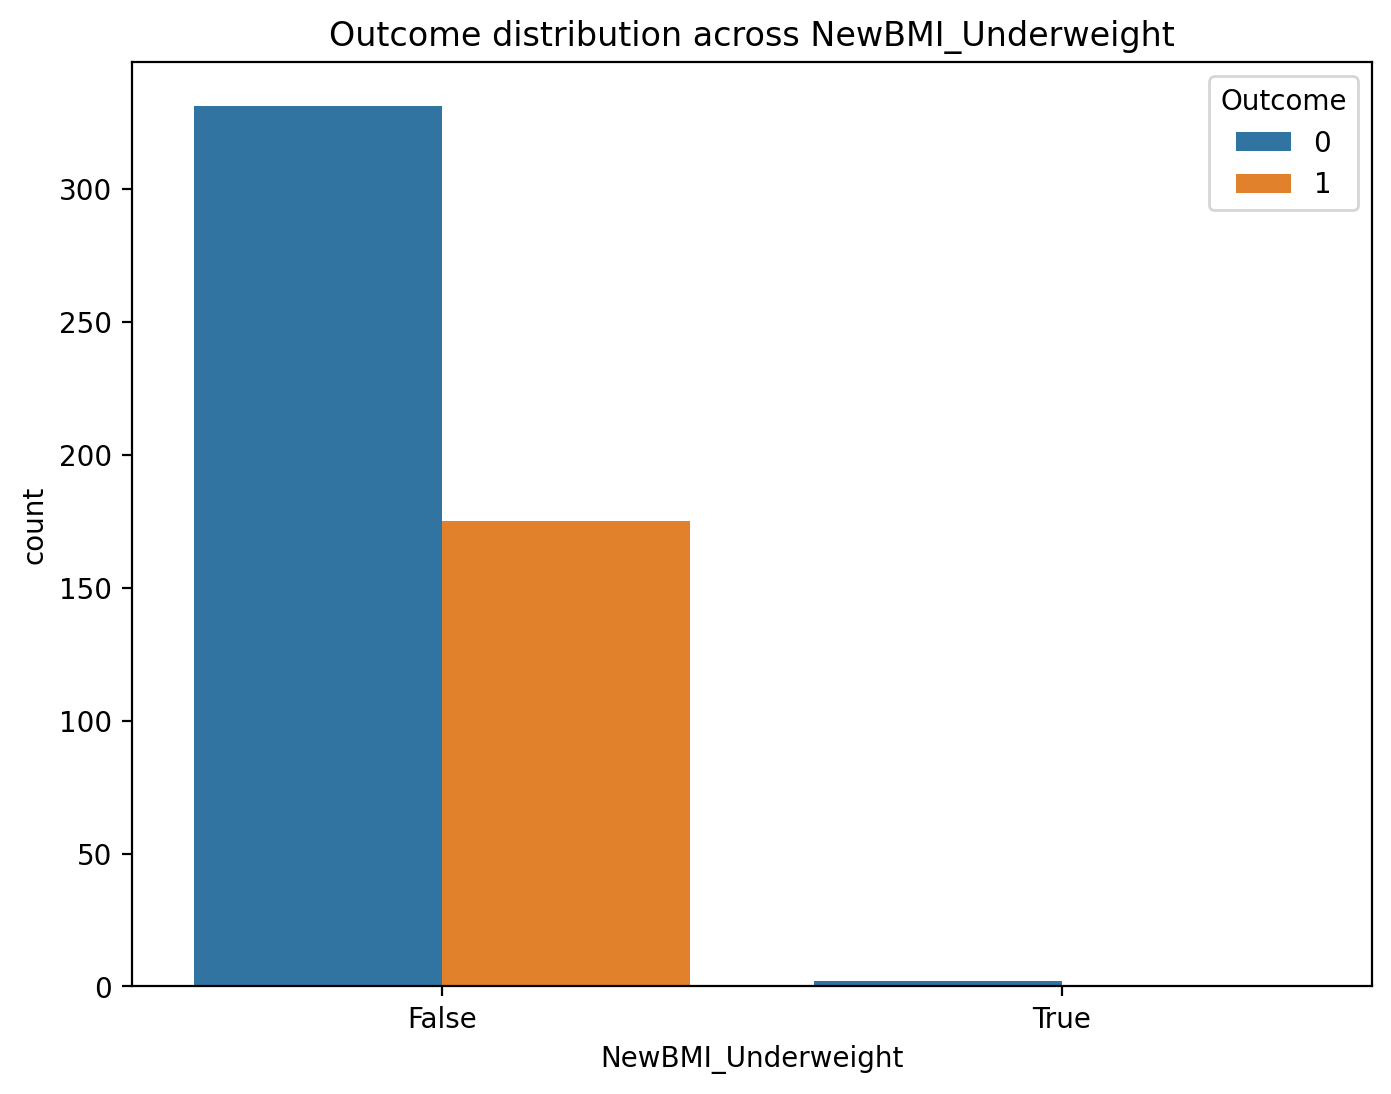

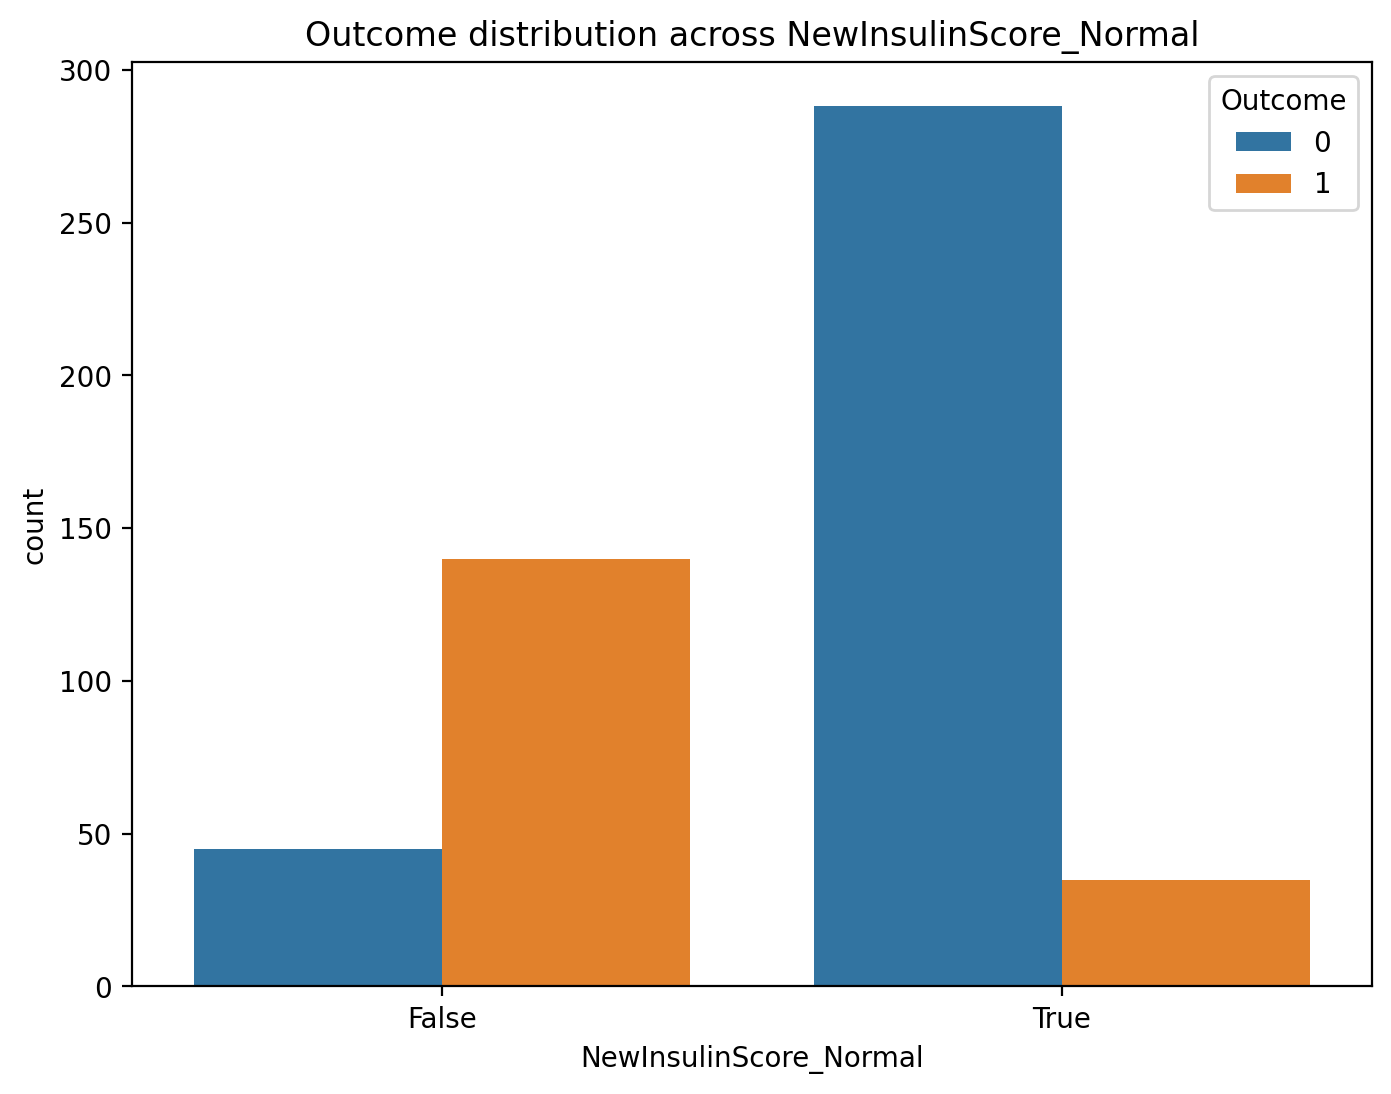

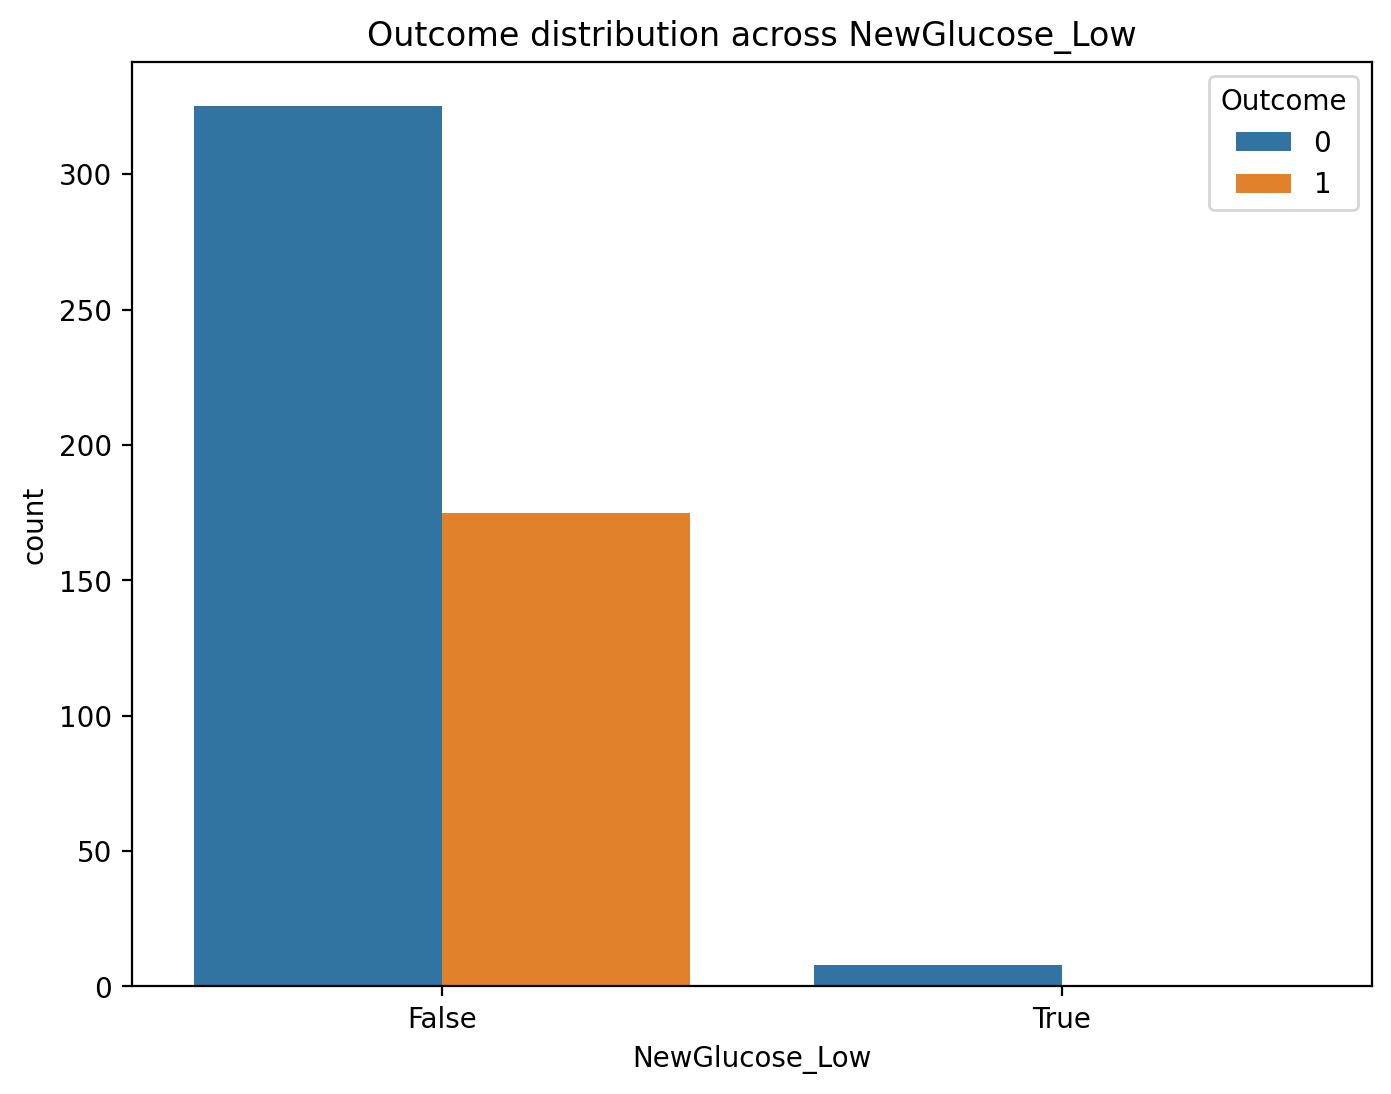

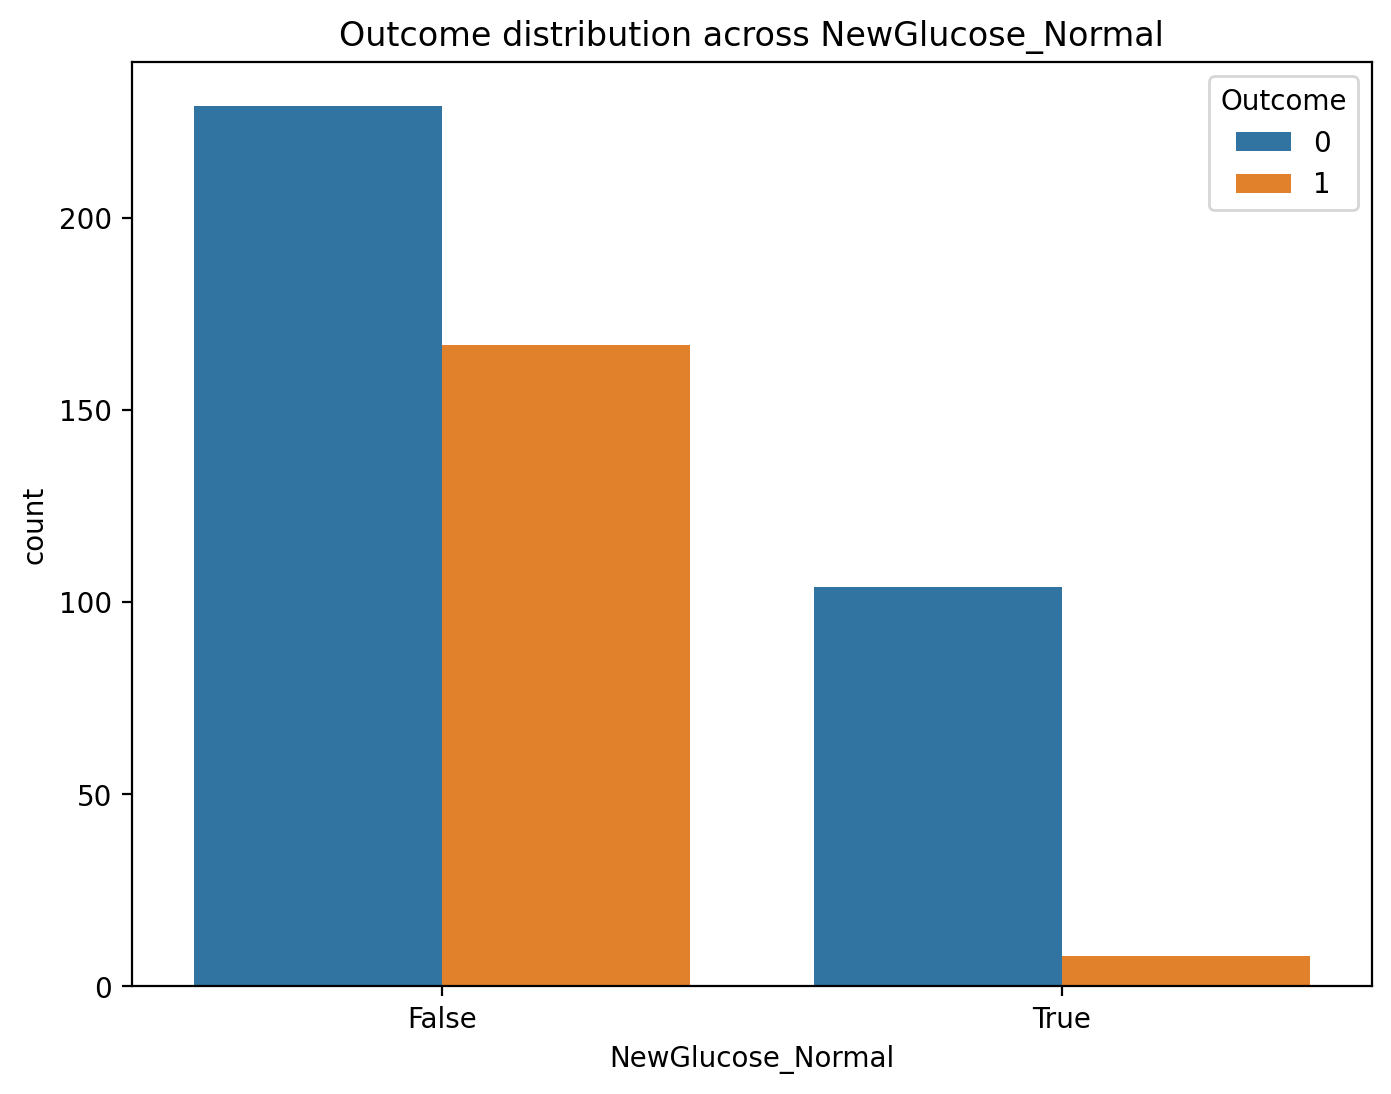

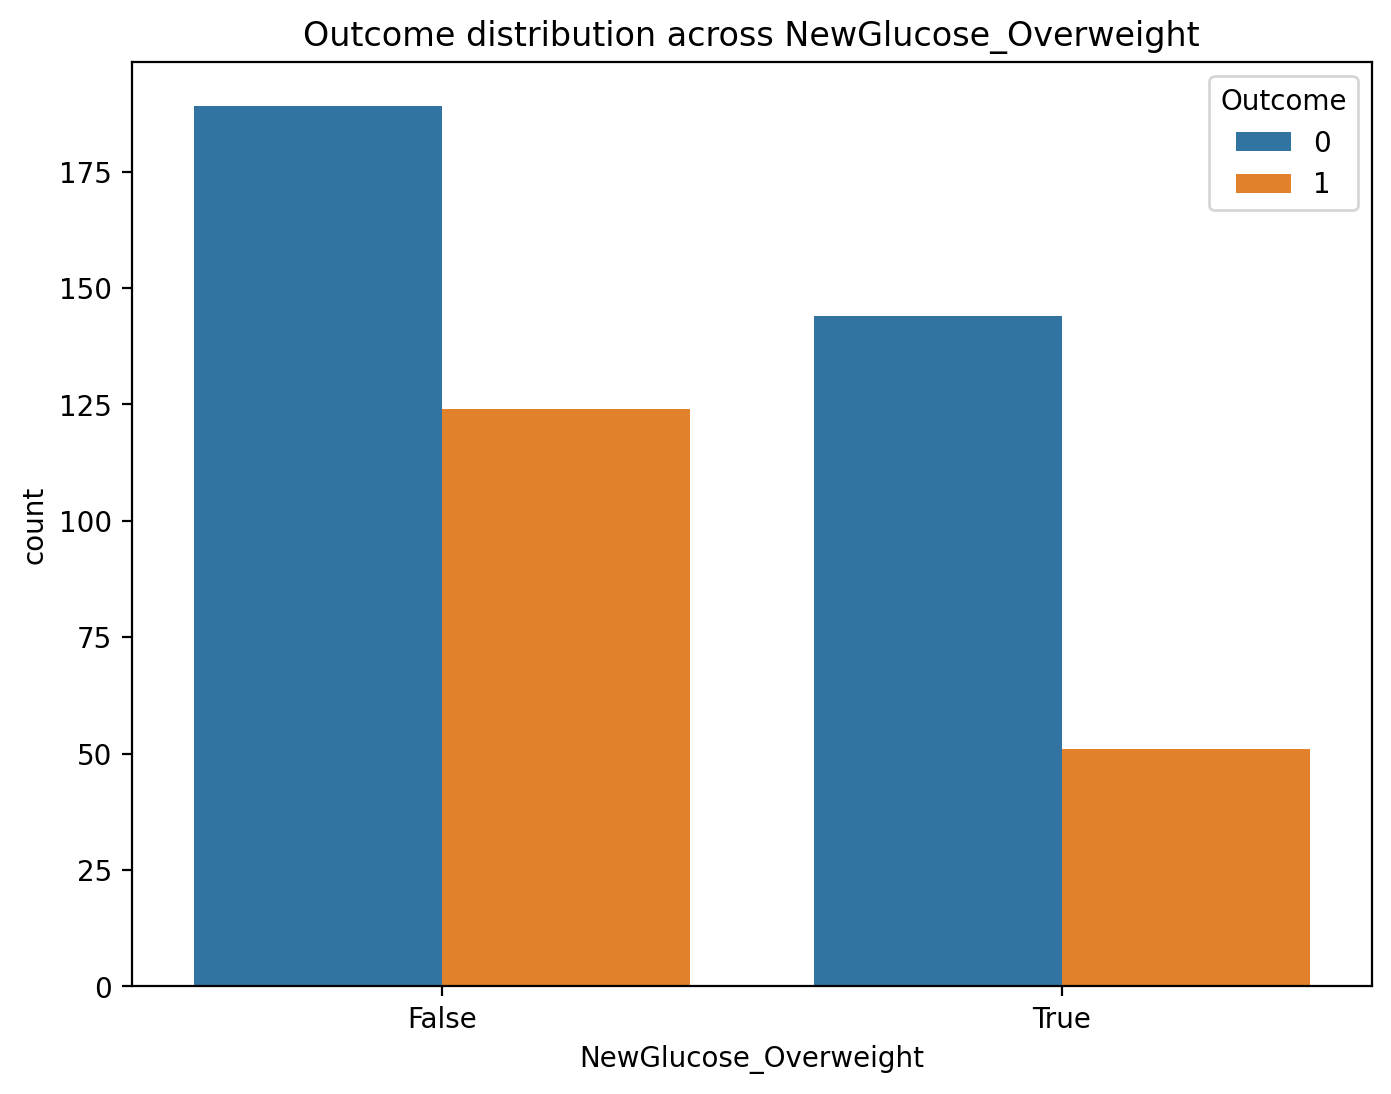

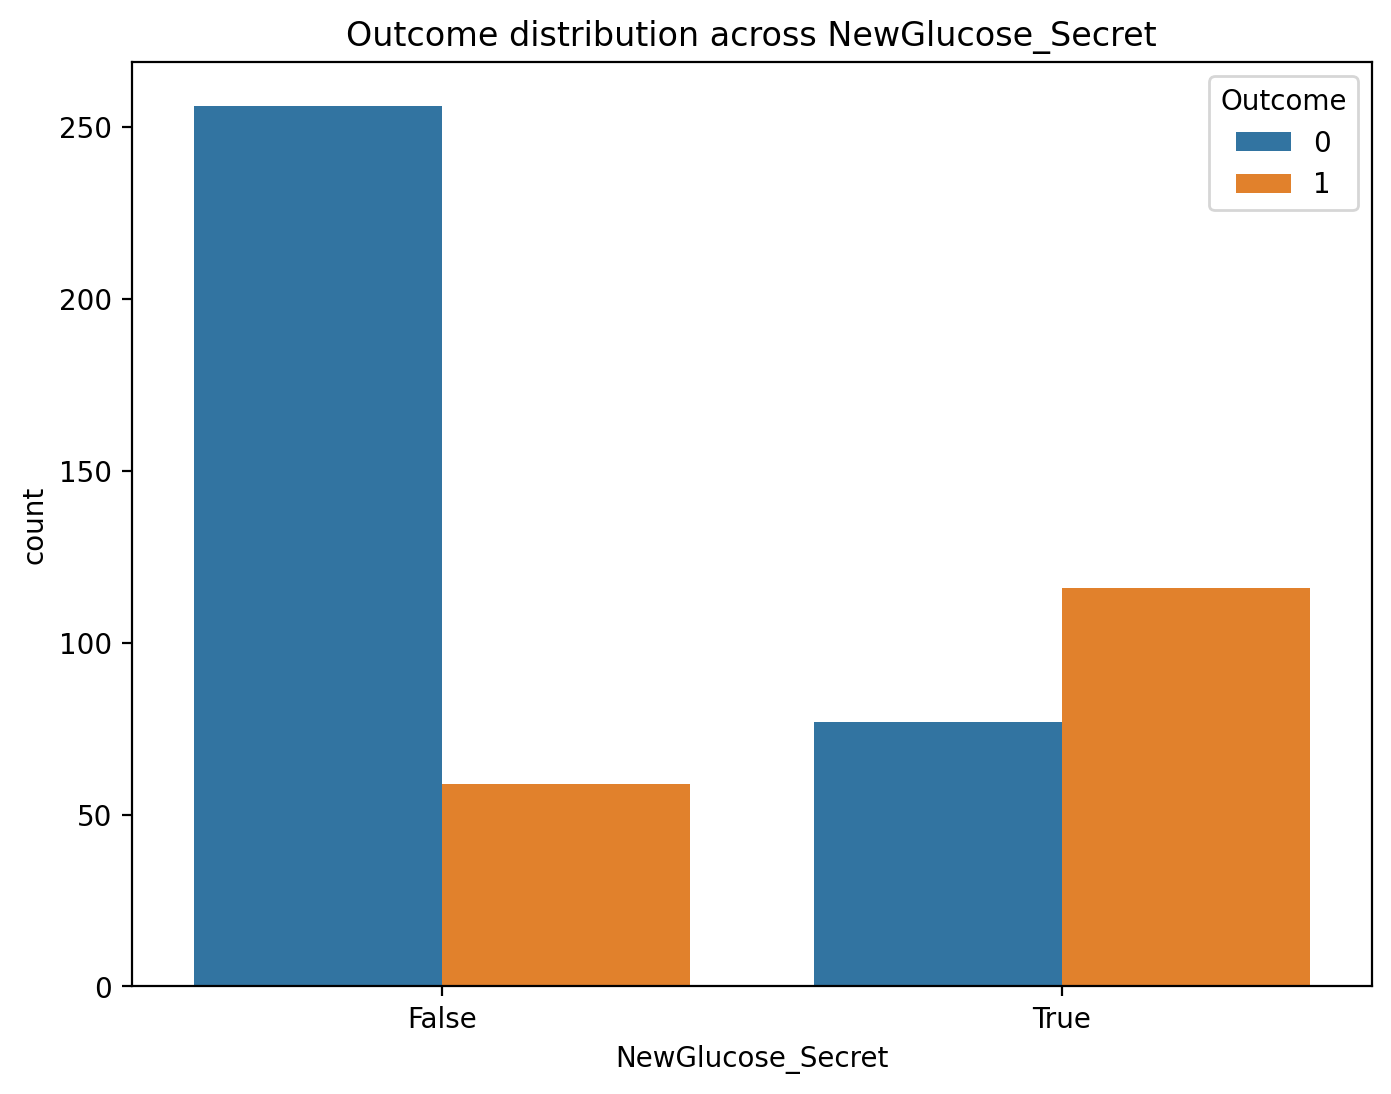

In [ ]:
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(diabetes_df[diabetes_df['Outcome'] == 0][col], label='Outcome = 0')
    sns.kdeplot(diabetes_df[diabetes_df['Outcome'] == 1][col], label='Outcome = 1')
    plt.title(f'Distribution of {col} by Outcome')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=col, data=diabetes_df)
    plt.title(f'Boxplot of {col} by Outcome')
    plt.show()

sns.pairplot(diabetes_df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin'])
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Glucose', hue='Outcome', data=diabetes_df)
plt.title('Trend of Glucose levels with Age by Outcome')
plt.show()


for col in ['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight',
            'NewInsulinScore_Normal','NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']:
    plt.figure(figsize=(8,6))
    sns.countplot(x = col, hue = 'Outcome', data=diabetes_df)
    plt.title(f'Outcome distribution across {col}')
    plt.show()

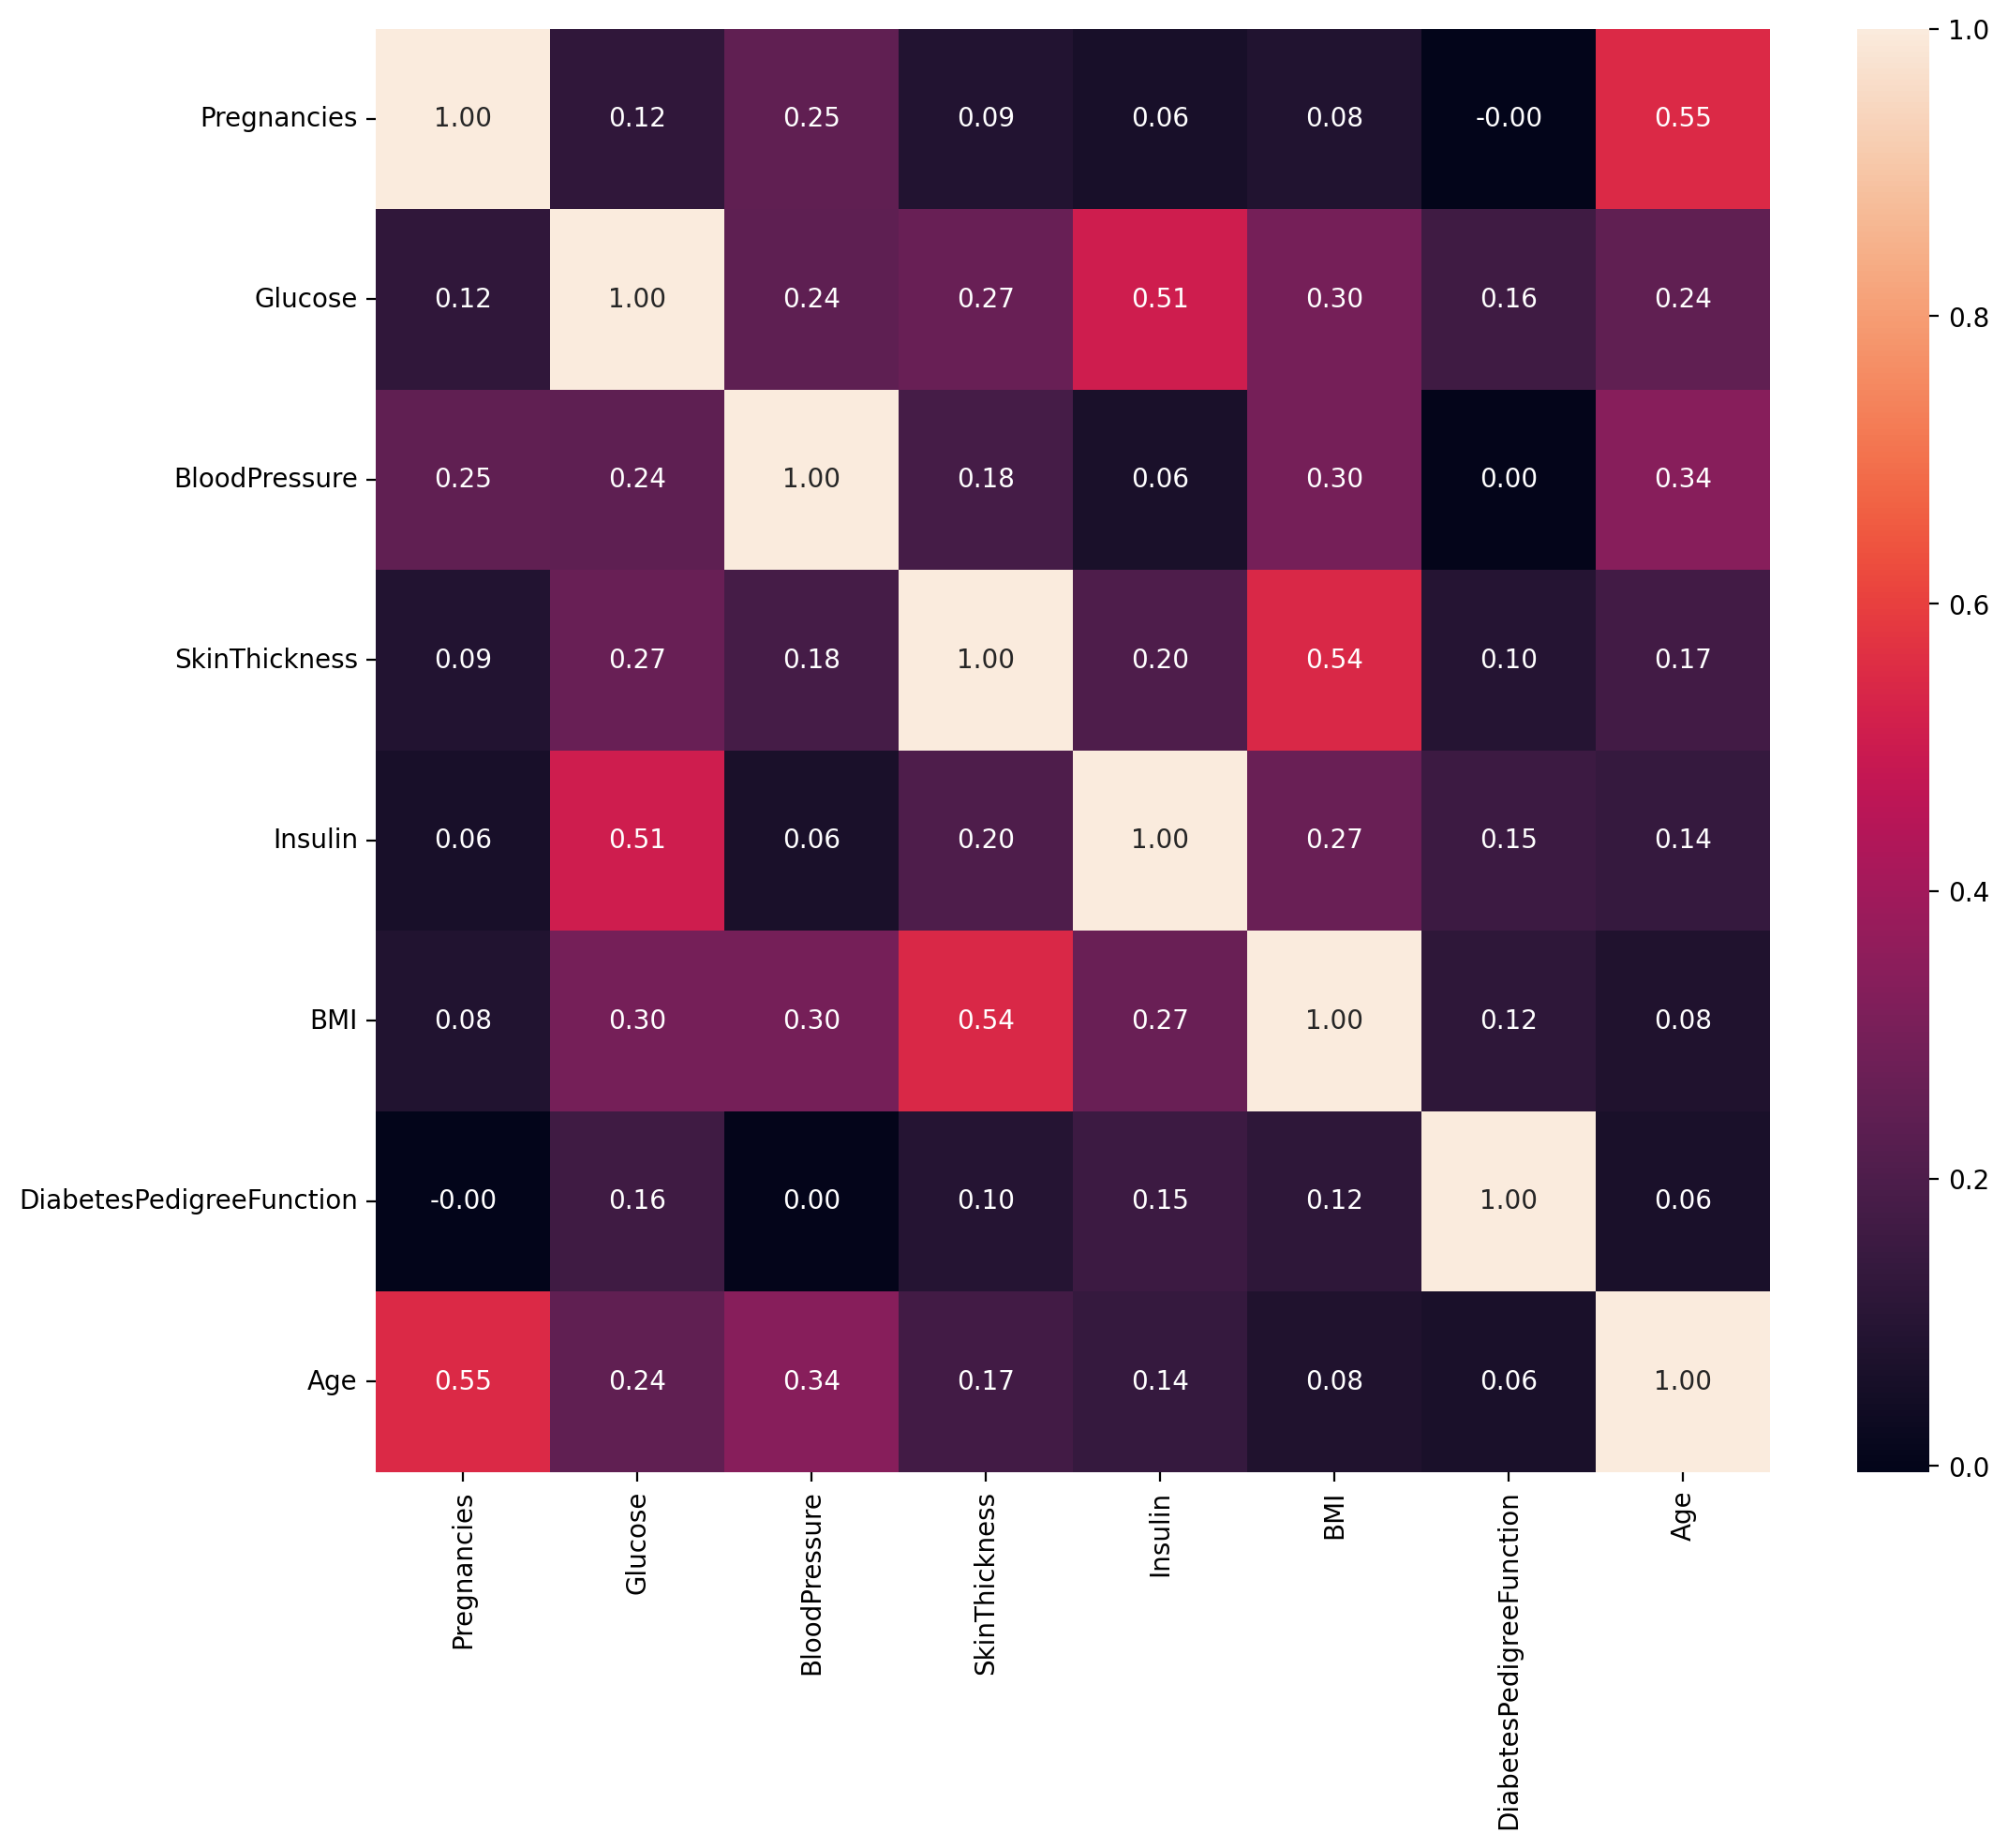

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.2/0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(355, 8) (355,)
(50, 8) (50,)
(103, 8) (103,)


In [ ]:
def model_selection_and_training(X_train, y_train, X_valid, y_valid):
    """
    Performs model selection, training, and evaluation using cross-validation.

    Args:
        X_train: Training features.
        y_train: Training target variable.
        X_valid: Validation features.
        y_valid: Validation target variable.

    Returns:
        The best performing model.
    """

    models = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Machine": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }

    best_model = None
    best_accuracy = 0

    for name, model in models.items():
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        print(f"{name} CV Accuracy: {np.mean(cv_scores)}")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        print(f"{name} Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_model_name = name


    print(f"\nBest Model: {best_model_name} with accuracy: {best_accuracy}")
    return best_model


best_model = model_selection_and_training(X_train, y_train, X_valid, y_valid)

Logistic Regression CV Accuracy: 0.7834126984126983
Logistic Regression Validation Accuracy: 0.78
K-Nearest Neighbors CV Accuracy: 0.8649206349206351
K-Nearest Neighbors Validation Accuracy: 0.78
Support Vector Machine CV Accuracy: 0.8538888888888889
Support Vector Machine Validation Accuracy: 0.78
Decision Tree CV Accuracy: 0.8056349206349207
Decision Tree Validation Accuracy: 0.74
Random Forest CV Accuracy: 0.8651587301587302
Random Forest Validation Accuracy: 0.84

Best Model: Random Forest with accuracy: 0.84


In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [10, 15, 20]
}


rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Random Forest Test Accuracy: {accuracy}")

print(classification_report(y_test,y_pred))

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Test Accuracy: 0.8446601941747572
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        75
           1       0.73      0.68      0.70        28

    accuracy                           0.84       103
   macro avg       0.81      0.79      0.80       103
weighted avg       0.84      0.84      0.84       103



In [ ]:
y_pred_test = best_rf_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Hold-out Accuracy: {accuracy_test}")

conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

class_report = classification_report(y_test, y_pred_test)
print(f"Classification Report:\n{class_report}")


Hold-out Accuracy: 0.8446601941747572
Confusion Matrix:
[[68  7]
 [ 9 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        75
           1       0.73      0.68      0.70        28

    accuracy                           0.84       103
   macro avg       0.81      0.79      0.80       103
weighted avg       0.84      0.84      0.84       103



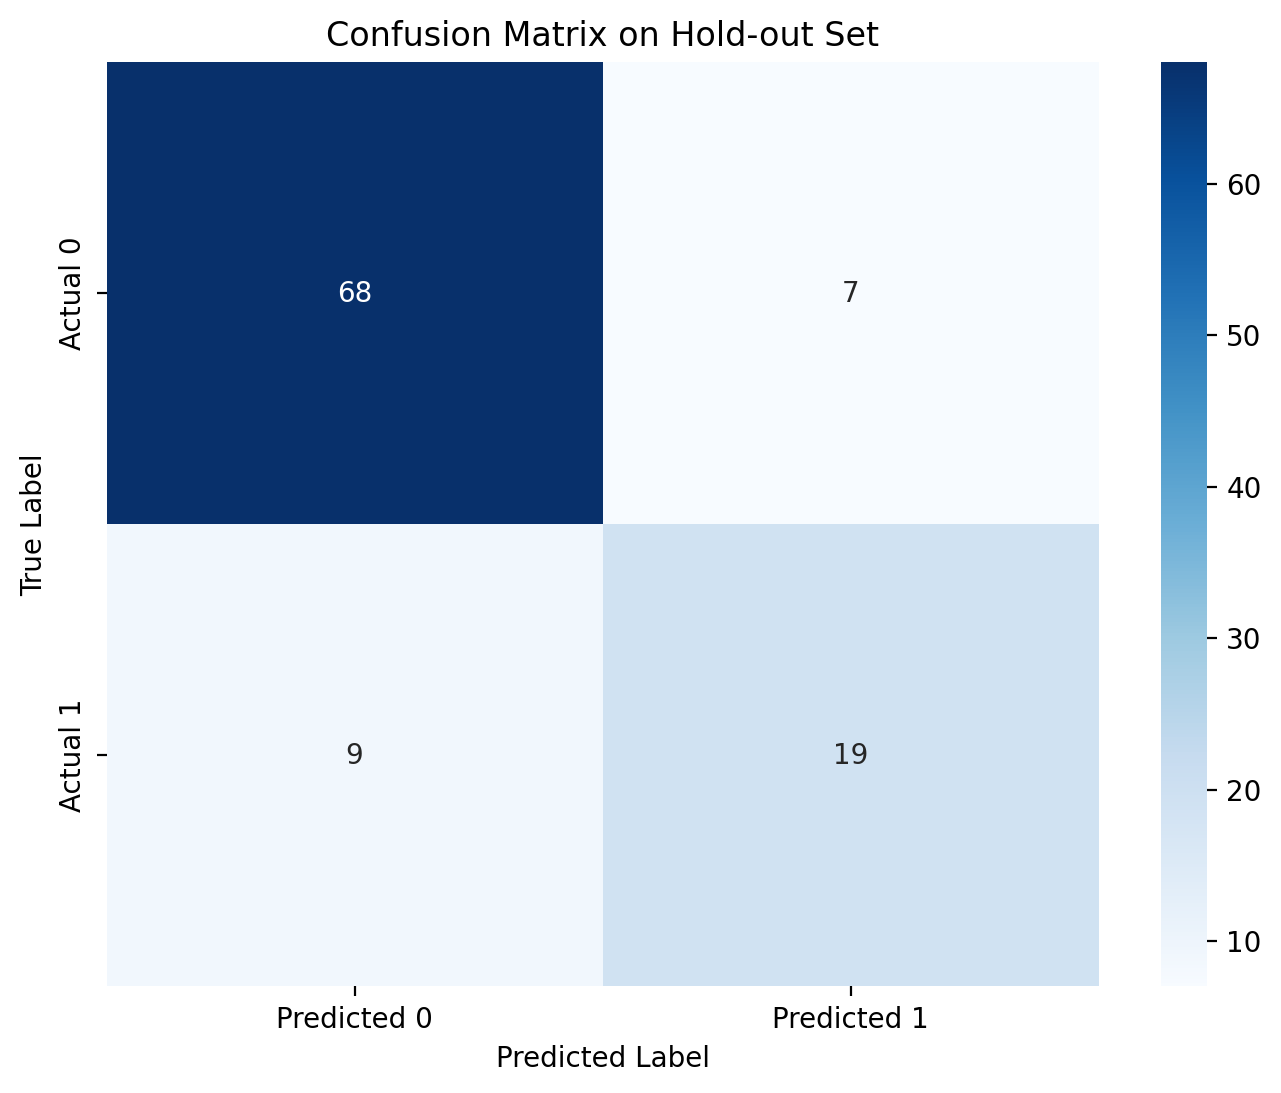

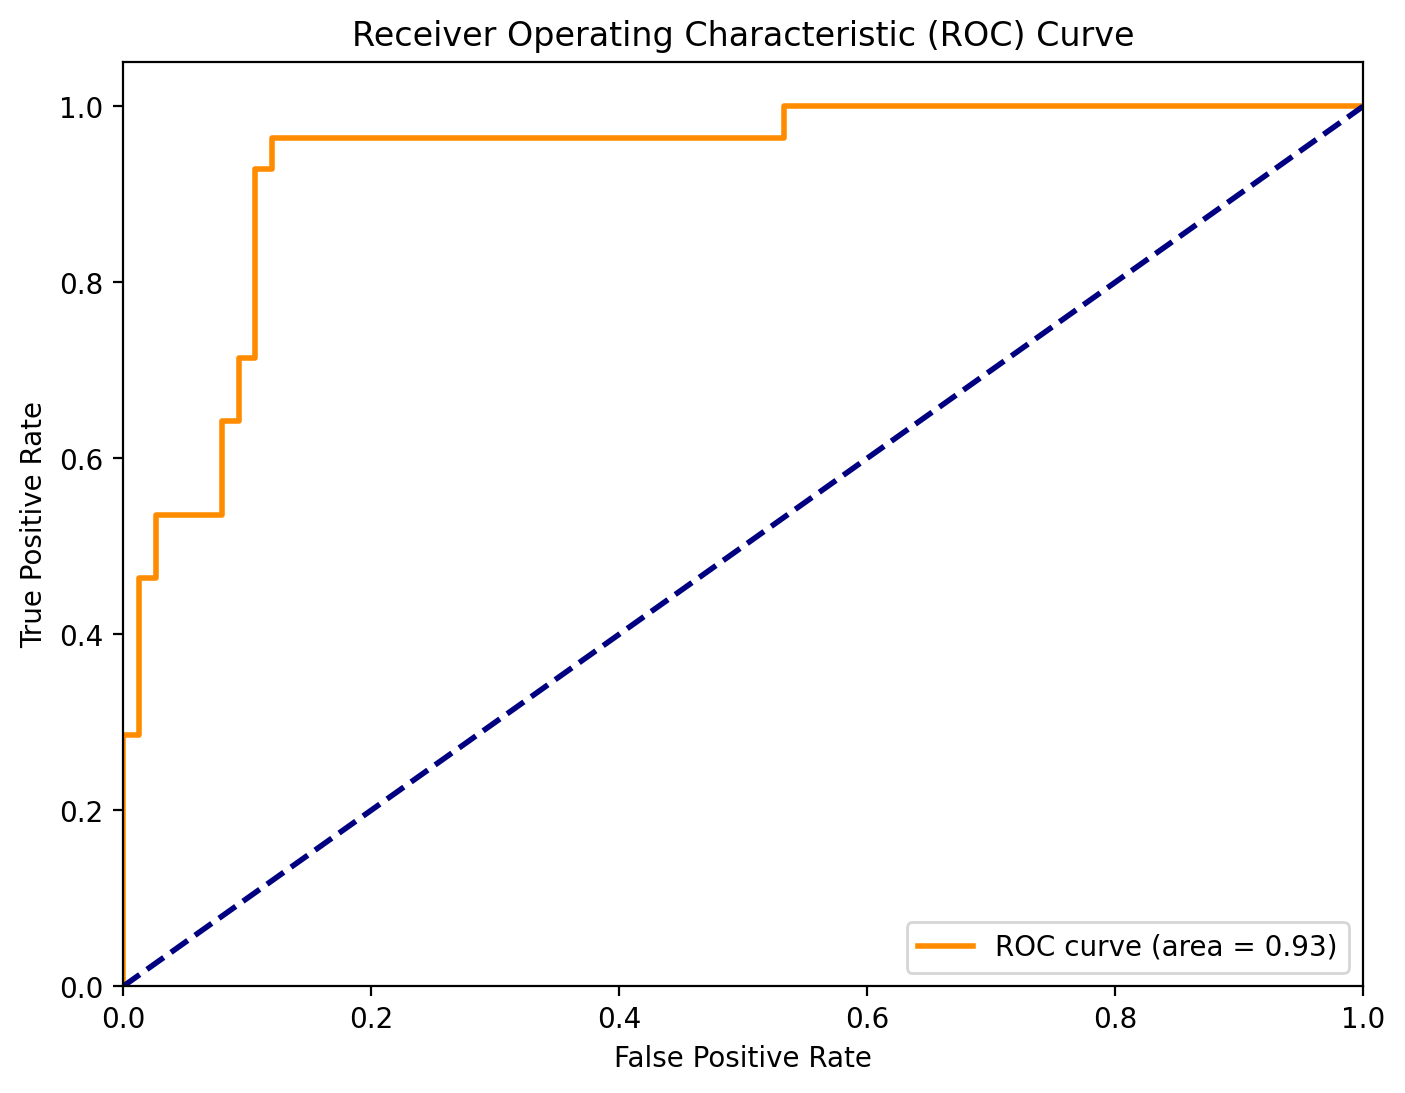

ROC AUC Score: 0.9342857142857144


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix on Hold-out Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import roc_curve, auc

y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc}")